# Titanic: Machine Learning from Disaster

In [1]:
# https://www.kaggle.com/c/titanic

In [1]:
import sklearn
import pandas as pd

In [2]:
# Загружаем данные из файлов
train = pd.read_csv('./homework/train.csv')
test = pd.read_csv('./homework/test.csv')

In [3]:
#train.head()

## Предобработка данных

In [4]:
# Заполняем пропуски в данных медианными 
# значениями факторов на обучающей выборке
train_median = train.median()
train_imp = train.fillna(train_median)
test_imp = test.fillna(train_median)

In [5]:
#train_median

In [6]:
# Бинаризуем категориальные признаки
CATEGORY_COL = ['Sex', 'Pclass', 'Embarked']
train_dummies = pd.get_dummies(train_imp, columns=CATEGORY_COL, drop_first=True)
test_dummies = pd.get_dummies(test_imp, columns=CATEGORY_COL, drop_first=True)

In [7]:
#train_dummies.head()

In [8]:
# Удаляем лишние столбцы
DROP_COL = ['PassengerId', 'Name', 'Ticket', 'Cabin']
TARGET_COL = 'Survived'
X_train = train_dummies.drop(DROP_COL + [TARGET_COL], axis=1)
y_train = train_dummies[TARGET_COL]
X_test = test_dummies.drop(DROP_COL, axis=1)

## Предсказание моделей для стеккинга

In [9]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def cross_val_predict_proba(estimator, X_train, y_train):
    #kfold = KFold(n_splits=4, shuffle=True, random_state=12345)
    kfold = KFold(n_splits=4, shuffle=True, random_state=None)
    return cross_val_predict(estimator, X_train, y_train, cv=kfold, method='predict_proba')

# TODO: подобрать гиперпараметры для ансамблей -->

In [10]:
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
kfold = KFold(n_splits=4, shuffle=True, random_state=None)

In [12]:
#функция для оценки качества модели
from sklearn import metrics

def auc_prc(train, predicted, predicted_proba ): 
    accuracy = metrics.accuracy_score( y_train, y_predicted )
    precision = metrics.precision_score( y_train, y_predicted ) 
    recall = metrics.recall_score( y_train, y_predicted ) 
    roc_auc = metrics.roc_auc_score( y_train, y_predicted_proba[:, 1] )
    prc_auc = metrics.average_precision_score( y_train, y_predicted_proba[:, 1] )
    
    pr, re, thres = metrics.precision_recall_curve(train, predicted_proba)
    fpr, tpr, thres2 = metrics.roc_curve( train, predicted_proba)
        
    print('accuracy = ', accuracy, sep='\t')
    print('precision = ', precision, sep='\t')
    print('recall = ', recall, sep='\t')
    print('roc_auc = ', roc_auc, sep='\t')
    print('prc_auc = ', prc_auc, sep='\t') 

### Подбираем параметры модели №1 : RandomForest

### Первый способ - поиск по сетке

In [21]:
#making a pipeline
pipelineRFC = Pipeline( steps=[ (  "model", RandomForestClassifier()  ) ] )

paramsRFC = {"model__max_depth": list(range(2, 8, 1)),
             "model__n_estimators": list(range(10, 200, 10)),
             "model__max_features": list(range(3, 6, 1)),
             "model__min_samples_leaf": list(range( 2, 5, 1)),
             "model__min_samples_split": list(range(3, 6, 1)) }

#формируем объект
gridRFC = GridSearchCV(pipelineRFC, paramsRFC, 
                    scoring='accuracy', verbose=10, 
                    cv=kfold, n_jobs=-1)

In [16]:
#RandomForestClassifier?

In [22]:
#запускаем отладку модели и смотрим на предложенные параметры
modelRFC = gridRFC.fit( X_train, y_train )
modelRFC.best_params_

#Перебор параметров выдал следующую комбинацию параметров, которая не дала повышения в качестве, поэтому был предпринят
#второй заход поиска оптимальной комбинации - о нем - см.след.ячейку тетрадки


Fitting 4 folds for each of 3078 candidates, totalling 12312 fits
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.780269, total=   0.1s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1180s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.747748, total=   0.1s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.825112, t

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.820628, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.802691, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.802691, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.811659, t

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.747748, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.789238, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.811659,

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.9s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.807175, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110, score=0.789238, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.825112, total=   0.6s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110, score=0.761261, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model

[Parallel(n_jobs=-1)]: Batch computation too slow (2.0555s.) Setting batch_size=1.


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.766816, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.802691, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.820628, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.74

[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    7.5s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.775785, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.820628, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.756757, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170, score=0.79

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    9.3s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=180, score=0.802691, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=180, score=0.789238, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=180, score=0.829596, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=180, score=0.76

[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:   11.1s


[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.752252, total=   1.1s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV] model__max_d

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.8s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.820628, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.784753, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.752252, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.811659, t

[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:   12.9s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.766816, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.774775, t

[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:   14.7s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.798206, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.811659, total=   0.5s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.793722, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.77

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   17.5s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.793722, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.789238, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.807175, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.75

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.0s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.802691, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.780269, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.825112, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.793722

[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:   22.5s


[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.765766, total=   0.2s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.802691, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.802691, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   23.9s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.825112, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.784753, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.747748, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.798206, t

[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:   26.7s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.793722, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.789238, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.816143, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.75

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   30.5s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.761261, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.807175, total=   1.0s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.757848, total=   1.0s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.80

[Parallel(n_jobs=-1)]: Done 239 tasks      | elapsed:   33.2s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.816143, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.775785, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.779279, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.802691, t

[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   35.3s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.789238, total=   0.5s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.752252, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100, score=0.79820

[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:   39.2s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150, score=0.807175, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150, score=0.816143, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150, score=0.825112, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150, score=0.75

[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   43.6s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30, score=0.793722, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30, score=0.829596, t

[Parallel(n_jobs=-1)]: Done 331 tasks      | elapsed:   45.3s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.825112, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.770270, t

[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   48.9s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.816143, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.771300, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.798206, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.76

[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 


[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:   53.9s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.761261, total=   1.0s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.738739, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.784753, 

[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   55.9s


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.774775, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.802691,

[Parallel(n_jobs=-1)]: Done 439 tasks      | elapsed:  1.0min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150, score=0.743243, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.775785, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.798206, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.82

[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.775785, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.825112, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 


[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:  1.1min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.766816, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.752252, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.789238, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.820628, t

[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110, score=0.770270, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120 


[Parallel(n_jobs=-1)]: Done 499 tasks      | elapsed:  1.1min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.816143, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.771300, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.834081, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.79

[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190, score=0.802691, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_

[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:  1.2min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.770270, t

[Parallel(n_jobs=-1)]: Done 563 tasks      | elapsed:  1.3min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.761261, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.789238, total=   0.5s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.816143

[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.766816, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.820628, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.747748, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 


[Parallel(n_jobs=-1)]: Done 596 tasks      | elapsed:  1.4min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.793722, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.780269, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.774775, total=   0.8s
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.825112, total=   0.9s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model

[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.798206, total=   0.2s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.802691, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.756757, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.771300, t

[Parallel(n_jobs=-1)]: Done 631 tasks      | elapsed:  1.4min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.793722, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.771300, total=   0.4s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.829596, total=   0.3s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.783784, t

[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140, score=0.771300, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140, score=0.765766, total=   0.6s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140, score=0.802691, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.77

[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  1.5min


[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.789238, total=   0.7s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.807175, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.802691, total=   0.8s
[CV] model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.75

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.734234, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.793722, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.780269, t

[Parallel(n_jobs=-1)]: Done 703 tasks      | elapsed:  1.6min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.766816, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.825112, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.734234, t

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.766816, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.807175, total=   0.6s
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.738739, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.81

[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:  1.7min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.770270, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.784753, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.802691, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.79

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.847534, total=   0.1s
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.793722, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.761261, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.802691, t

[Parallel(n_jobs=-1)]: Done 779 tasks      | elapsed:  1.8min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.771300, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.734234, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.829596, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70, score=0.802691, t

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.784753, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.734234, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.816143, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.78

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  1.9min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.747748, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.798206, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.775785, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.82

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.802691, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.793722, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.798206, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.734234, t

[Parallel(n_jobs=-1)]: Done 859 tasks      | elapsed:  2.0min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.771300, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.802691, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.756757, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.802691, t

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.798206, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.765766, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150, score=0.780269, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150, score=0.82

[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:  2.1min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.820628, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.784753, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.829596, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.73

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.798206, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.747748, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.816143, t

[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  2.1min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80, score=0.743243, total=   0.5s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.784753, total=   0.4s
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.802691, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.816143,

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.820628, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.784753, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.798206, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.76

[Parallel(n_jobs=-1)]: Done 986 tasks      | elapsed:  2.3min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.747748, total=   0.1s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.820628, total=   0.9s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.798206, 

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.752252, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.766816, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.825112, 

[Parallel(n_jobs=-1)]: Done 1031 tasks      | elapsed:  2.3min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.802691, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.771300, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.825112, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.75

[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.0s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.748879, total=   0.0s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.0s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  2.5min


[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.738739, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.780269, total=   0.2s
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_d

[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.816143, total=   0.5s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.820628, total=   0.5s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.793722, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model

[Parallel(n_jobs=-1)]: Done 1123 tasks      | elapsed:  2.6min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150, score=0.734234, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.816143, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.784753, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.79

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.789238, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.793722, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.734234, t

[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:  2.7min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.784753, total=   0.5s
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.734234

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.793722, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.802691, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.743243, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.76

[Parallel(n_jobs=-1)]: Done 1219 tasks      | elapsed:  2.8min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.743243, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.811659, t

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.816143, total=   0.4s
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.793722, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.825112, total=   0.5s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.73

[Parallel(n_jobs=-1)]: Done 1268 tasks      | elapsed:  2.9min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.798206, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.798206, total=   0.6s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.757848, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.75

[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.852018, total=   0.1s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.738739, total=   0.1s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.802691, total=   0.2s
[CV] model__max_de

[Parallel(n_jobs=-1)]: Done 1319 tasks      | elapsed:  3.0min


[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.820628, total=   0.4s
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.784753, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.825112, total=   0.4s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.734234, t

[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.780269, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.798206, total=   0.7s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.743243, total=   0.8s
[CV] model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.81

[Parallel(n_jobs=-1)]: Done 1370 tasks      | elapsed:  3.2min


[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.738739, total=   1.0s
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.734234, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_

[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.738739, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100, score=0.798206, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100, score=0.780269, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110 
[CV]  model_

[Parallel(n_jobs=-1)]: Done 1423 tasks      | elapsed:  3.3min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.734234, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.816143, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.784753, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.79

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.734234, total=   1.0s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.743243, 

[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:  3.4min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.784753, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.734234

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.834081, total=   0.8s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.816143, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.734234, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.80

[Parallel(n_jobs=-1)]: Done 1531 tasks      | elapsed:  3.5min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.780269, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.738739, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.811659, t

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.798206, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.738739, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.820628, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.78

[Parallel(n_jobs=-1)]: Done 1586 tasks      | elapsed:  3.7min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.738739, total=   0.8s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.798206, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.784753, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.81

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.784753, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.738739, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.811659, t

[Parallel(n_jobs=-1)]: Done 1643 tasks      | elapsed:  3.8min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.798206, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.780269, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.816143, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.73

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.752252, total=   0.1s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.802691, t

[Parallel(n_jobs=-1)]: Done 1700 tasks      | elapsed:  3.9min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.784753, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.734234, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.820628, t

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.816143, total=   0.8s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.738739, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160, score=0.811659, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160, score=0.78

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.734234, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.838565, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 


[Parallel(n_jobs=-1)]: Done 1759 tasks      | elapsed:  4.0min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.738739, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.789238, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.811659, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.811659, t

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.738739, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.798206, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.78

[Parallel(n_jobs=-1)]: Done 1818 tasks      | elapsed:  4.2min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180, score=0.825112, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180, score=0.734234, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190, score=0.816143, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190, score=0.784

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.747748, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.816143, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.780269, total=   0.3s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.820628, t

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.807175, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.784753, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.816143, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.74

[Parallel(n_jobs=-1)]: Done 1879 tasks      | elapsed:  4.3min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.816143, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.780269, total=   0.8s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.816143, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.73

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.734234, total=   0.2s
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.820628, t

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.807175, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.734234, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110, score=0.784753, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110, score=0.78

[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:  4.4min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110, score=0.811659, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110, score=0.734234, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120, score=0.802691, total=   0.6s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120, score=0.78

[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180, score=0.734234, total=   0.8s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190, score=0.793722, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190, score=0.820628, total=   0.9s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__

[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.816143, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.780269, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.798206, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 2003 tasks      | elapsed:  4.6min


[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.784753, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.816143, total=   0.5s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.793722, total=   0.4s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.734234, t

[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.780269, total=   0.8s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.829596, total=   0.8s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.738739, total=   0.7s
[CV] model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=2, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.80

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.834081, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.806306, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.807175, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.807175, t

[Parallel(n_jobs=-1)]: Done 2066 tasks      | elapsed:  4.8min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.802691, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.792793, total=   0.3s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.843049, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_es

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.807175, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.865471, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.779279, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.81

[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.748879, total=   0.1s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.834081, total=   0.1s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.820628, total=   1.0s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_

[Parallel(n_jobs=-1)]: Done 2131 tasks      | elapsed:  4.9min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.806306, total=   1.0s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.797297, total=   0.1s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.811659, 

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.843049, total=   0.5s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.807175, total=   0.5s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.816143, total=   0.5s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.770

[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.811659, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.820628, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.852018, total=   0.8s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.77

[Parallel(n_jobs=-1)]: Done 2196 tasks      | elapsed:  5.1min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.811659, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.816143, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.801802, total=   0.9s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.86

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.788288, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.852018, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.811659, t

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.852018, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.810811, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.820628, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.81

[Parallel(n_jobs=-1)]: Done 2263 tasks      | elapsed:  5.2min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.816143, total=   0.8s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.816143, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.852018, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.79

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.811659, total=   0.2s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.834081, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.801802, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.807175, t

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.806306, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.816143, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.81

[Parallel(n_jobs=-1)]: Done 2330 tasks      | elapsed:  5.4min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.783784, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.811659, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.807175, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.85

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.838565, total=   0.1s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.801802, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.788288, 

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.865471, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.801802, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100, score=0.81165

[Parallel(n_jobs=-1)]: Done 2399 tasks      | elapsed:  5.5min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.811659, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.865471, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.77

[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.825112, total=   0.9s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.766816, total=   0.1s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_

[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.788288, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 2468 tasks      | elapsed:  5.7min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.820628, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.806306, total=   0.5s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.834081, total=   0.5s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model

[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.811659, total=   0.9s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.852018, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.783784, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.779279, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 2539 tasks      | elapsed:  5.8min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.865471, total=   0.5s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.806306

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.820628, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.801802, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.865471, total=   0.8s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.81

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.797297, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.865471, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.811659, t

[Parallel(n_jobs=-1)]: Done 2610 tasks      | elapsed:  6.0min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.825112, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.856502, total=   0.4s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.810811, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_es

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.811659, total=   0.9s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.783784, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.838565, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.81

[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.774775, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.834081, total=   0.2s
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.807175, total=   0.2s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV] model__max_de

[Parallel(n_jobs=-1)]: Done 2683 tasks      | elapsed:  6.2min


[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.807175, total=   0.4s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.838565, total=   0.3s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.783784, t

[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140, score=0.820628, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140, score=0.838565, total=   0.7s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140, score=0.810811, total=   0.6s
[CV] model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.82

[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.797297, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.825112, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.847534, total=   0.2s
[CV] model__max_de

[Parallel(n_jobs=-1)]: Done 2756 tasks      | elapsed:  6.4min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.802691, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.874439, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.783784, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.811659, t

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.838565, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.788288, total=   0.8s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.816143, total=   0.8s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.85

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.783784, 

[Parallel(n_jobs=-1)]: Done 2831 tasks      | elapsed:  6.5min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.774775, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.843049, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70, score=0.820628, t

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.816143, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.820628, total=   0.6s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.788288, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.80

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.788288, total=   0.8s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.847534, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.792793, 

[Parallel(n_jobs=-1)]: Done 2906 tasks      | elapsed:  6.7min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.843049, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.792793, t

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.807175, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.838565, total=   0.6s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.783784, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.81

[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.834081, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.838565, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.852018, total=   0.1s
[CV] model__max_de

[Parallel(n_jobs=-1)]: Done 2983 tasks      | elapsed:  6.9min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.838565, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.779279, t

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.810811, total=   0.6s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.802691, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.838565, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.81

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.783784, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.829596, total=   1.0s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.783784, total=   0.9s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.793722,

[Parallel(n_jobs=-1)]: Done 3060 tasks      | elapsed:  7.1min


[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.829596, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.788288, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_d

[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130, score=0.856502, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130, score=0.783784, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.816143, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model

[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.843049, total=   0.1s
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 3139 tasks      | elapsed:  7.3min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.847534, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.783784, t

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.807175, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.834081, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.801802, total=   0.8s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150, score=0.81

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.788288, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190, score=0.783784, 

[Parallel(n_jobs=-1)]: Done 3218 tasks      | elapsed:  7.4min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.825112, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.792793, t

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.816143, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.838565, total=   0.8s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.783784, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.81

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.843049, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.810811, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.820628, t

[Parallel(n_jobs=-1)]: Done 3299 tasks      | elapsed:  7.6min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.852018, total=   0.4s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.792793

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.801802, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.847534, total=   0.7s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.820628, total=   0.9s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.81

[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.847534, total=   0.3s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.779279, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.807175, total=   0.2s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.816143, t

[Parallel(n_jobs=-1)]: Done 3380 tasks      | elapsed:  7.8min


[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100, score=0.820628, total=   0.5s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100, score=0.807175, total=   0.6s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100, score=0.843049, total=   0.5s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100, score=0.78

[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170, score=0.816143, total=   0.8s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170, score=0.843049, total=   0.8s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170, score=0.788288, total=   0.9s
[CV] model__max_depth=3, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.783784, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.802691, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 3463 tasks      | elapsed:  8.0min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110, score=0.788288, total=   0.7s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.807175, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.86

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.843049, total=   0.8s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.811659, total=   0.9s
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.816143, total=   1.0s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__m

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70, score=0.807175, total=   0.4s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70, score=0.779279, total=   0.4s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70, score=0.847534, total=   0.4s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 3546 tasks      | elapsed:  8.2min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.788288, total=   0.7s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.838565, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.811659, total=   0.7s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.81

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.783784, total=   1.1s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.779279, total=   0.1s
[CV] model__max_d

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.834081, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.792793, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100, score=0.81165

[Parallel(n_jobs=-1)]: Done 3631 tasks      | elapsed:  8.4min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.802691, total=   0.8s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.811659, total=   1.0s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.847534, total=   0.8s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.78

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.789238, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.843049, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.761261, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.802691, t

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.847534, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.783784, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.81

[Parallel(n_jobs=-1)]: Done 3716 tasks      | elapsed:  8.6min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180, score=0.807175, total=   0.8s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180, score=0.811659, total=   0.9s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180, score=0.838565, total=   1.0s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180, score=0.79

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.847534, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.788288, total=   0.4s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.811659, t

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130, score=0.838565, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130, score=0.783784, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.816143, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.78

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.765766, total=   0.1s
[CV] model__max_de

[Parallel(n_jobs=-1)]: Done 3803 tasks      | elapsed:  8.8min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.847534, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.815315, t

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.807175, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.843049, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.788288, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.81

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.802691, total=   0.9s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.792793, total=   0.8s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180, score=0.816143, total=   0.9s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[Parallel(n_jobs=-1)]: Done 3890 tasks      | elapsed:  9.0min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.838565, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.783784, t

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.816143, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.843049, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.783784, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.81

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.748879, total=   0.1s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190, score=0.843049, total=   0.8s
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190, score=0.802691, total=   0.9s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70, score=0.783784, total=   0.3s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80 


[Parallel(n_jobs=-1)]: Done 3979 tasks      | elapsed:  9.2min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.811659, total=   0.5s
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.834081, total=   0.4s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.783784, t

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.807175, total=   0.7s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.779279, total=   0.7s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.838565, total=   0.9s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.81

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.783784, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190, score=0.788288, total=   1.1s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.816143, 

[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100, score=0.783784, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.807175, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 


[Parallel(n_jobs=-1)]: Done 4068 tasks      | elapsed:  9.4min


[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.807175, total=   0.6s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.829596, total=   0.7s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.783784, total=   0.5s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.80

[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.788288, total=   0.8s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.838565, total=   0.9s
[CV] model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=3, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.811659, total=   1.0s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model_

[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.843049, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.820628, total=   0.3s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_d

[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.807175, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.856502, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model

[Parallel(n_jobs=-1)]: Done 4159 tasks      | elapsed:  9.7min


[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.825112, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.807175, total=   0.8s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.852018, total=   0.8s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.80

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.816143, total=   0.2s
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.852018, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.806306, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.811659, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.860987, total=   0.5s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.806306, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.81

[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.828829, total=   0.9s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.825112, total=   0.9s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.811659, total=   0.9s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model

[Parallel(n_jobs=-1)]: Done 4250 tasks      | elapsed:  9.9min


[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.797297, total=   0.9s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.820628, total=   0.9s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.811659

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.811659, total=   0.3s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.810811, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.865471, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.816143, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.860987, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.801802, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150, score=0.82

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.792793, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190, score=0.801802, 

[Parallel(n_jobs=-1)]: Done 4343 tasks      | elapsed: 10.1min


[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.816143, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.843049, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.810811, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.811659, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.811659, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.824324, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.81

[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180, score=0.810811, total=   0.9s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.820628, total=   1.0s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__m

[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.843049, total=   0.3s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.798206, total=   0.4s
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.815315, t

[Parallel(n_jobs=-1)]: Done 4436 tasks      | elapsed: 10.3min


[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.834081, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.797297, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.865471, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.820628, total=   0.8s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.806306, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160, score=0.82

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.852018, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.806306, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.825112, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.811659, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.828829, total=   0.5s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.816143, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.85

[Parallel(n_jobs=-1)]: Done 4531 tasks      | elapsed: 10.5min


[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.797297, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130, score=0.825112, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130, score=0.865471, total=   0.6s
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.788288, total=   0.0s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.843049, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.789238, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.860987, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.801802, total=   0.5s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.820628, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.847534, total=   0.8s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.806306, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.829596, total=   0.8s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.81

[Parallel(n_jobs=-1)]: Done 4626 tasks      | elapsed: 10.8min


[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.820628, total=   0.8s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.815315, total=   0.8s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.820628, total=   1.0s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.84

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.838565, total=   0.3s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.788288, total=   0.3s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70, score=0.820628, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130, score=0.815315, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130, score=0.865471, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.802691, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.81

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.843049, total=   0.1s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.801802, t

[Parallel(n_jobs=-1)]: Done 4723 tasks      | elapsed: 11.0min


[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.829596, total=   0.3s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.856502, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.810811, total=   0.2s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.811659, t

[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.860987, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.792793, total=   0.7s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.82

[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.819820, total=   0.9s
[CV] model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.811659, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.825112, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.820628, total=   0.3s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.852018, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 4820 tasks      | elapsed: 11.2min


[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.801802, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.838565

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.816143, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.806306, total=   0.8s
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.860987, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170, score=0.82

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.860987, total=   0.2s
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.797297, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.797297, t

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.810811, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.825112, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.85

[Parallel(n_jobs=-1)]: Done 4919 tasks      | elapsed: 11.5min


[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.820628, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.802691, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.856502, total=   0.7s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.80

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.816143, total=   0.2s
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.847534, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.801802, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.825112, t

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100, score=0.802691, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100, score=0.847534, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.81

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.815315, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.825112, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.807175, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[Parallel(n_jobs=-1)]: Done 5018 tasks      | elapsed: 11.7min


[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.852018, total=   0.1s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.792793, total=   0.1s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30, score=0.816143, total=   0.2s
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190, score=0.801802, total=   1.0s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_e

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.852018, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.819820, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100, score=0.820628, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100, score=0.8116

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.797297, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170, score=0.825112, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170, score=0.811659, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.829596, total=   0.3s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.797297, total=   0.3s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 5119 tasks      | elapsed: 11.9min


[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.797297, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.843049, t

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.825112, total=   0.7s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.856502, total=   0.7s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.801802, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160, score=0.82

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.797297, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.3s
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.860987, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV] model__max_de

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.847534, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.83

[Parallel(n_jobs=-1)]: Done 5220 tasks      | elapsed: 12.2min


[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.847534, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.825112, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.820628, total=   0.7s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.80

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.856502, total=   0.1s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.806306, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.843049, total=   0.2s
[CV] model__max_de

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.843049, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.801802, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.8295

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.797297, total=   1.0s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.820628, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.825112, total=   1.0s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180 
[CV]  model

[Parallel(n_jobs=-1)]: Done 5323 tasks      | elapsed: 12.5min


[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.788288, total=   0.1s
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.829596, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.802691, t

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.806306, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.816143, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.807175, total=   0.6s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.843

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.820628, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.825112, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.860987, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.825112, total=   0.3s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.810811, total=   0.3s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.838565, total=   0.4s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 5426 tasks      | elapsed: 12.7min


[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.825112, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.847534, total=   0.5s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.806306

[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.807175, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.797297, total=   0.8s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.847534, total=   0.9s
[CV] model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170, score=0.82

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.801802, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.843049, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.798206, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50, score=0.816143, t

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110, score=0.801802, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.802691, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.85

[Parallel(n_jobs=-1)]: Done 5531 tasks      | elapsed: 13.0min


[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.825112, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.802691, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.834081, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.80

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.843049, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.806306, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.825112, t

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.843049, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.797297, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.825112, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.80

[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.792793, total=   1.0s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.825112, total=   1.0s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__m

[Parallel(n_jobs=-1)]: Done 5636 tasks      | elapsed: 13.2min


[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.801802, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.843049, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.807175, t

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.801802, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.816143, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.807175, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.84

[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190, score=0.820628, total=   1.1s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190, score=0.798206, total=   1.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__ma

[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70, score=0.852018, total=   0.4s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70, score=0.801802, total=   0.4s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 5743 tasks      | elapsed: 13.5min


[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.802691, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.792793, total=   0.5s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.84

[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.0s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.816143, total=   1.1s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_

[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.838565, total=   0.4s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.801802, total=   0.4s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_d

[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.801802, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.820628, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.798206, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model

[Parallel(n_jobs=-1)]: Done 5850 tasks      | elapsed: 13.8min


[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.788288, total=   0.1s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.838565, 

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.838565, total=   0.4s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.792793, total=   0.5s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.811659, 

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150, score=0.838565, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.820628, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.807175, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.85

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.798206, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.807175, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.847534, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.797297, t

[Parallel(n_jobs=-1)]: Done 5959 tasks      | elapsed: 14.0min


[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.825112, total=   0.5s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.843049, total=   0.5s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.797297

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.829596, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.852018, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.797297, total=   0.9s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.82

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.847534, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.801802, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.798206, t

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110, score=0.797297, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120, score=0.820628, total=   0.6s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120, score=0.807175, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=120, score=0.83

[Parallel(n_jobs=-1)]: Done 6068 tasks      | elapsed: 14.3min


[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.825112, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.838565, total=   0.9s
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.807175, total=   0.9s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.80

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.807175, total=   0.3s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.843049, total=   0.3s
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.788288, total=   0.2s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.816143, t

[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.843049, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.801802, total=   0.8s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.816143, total=   0.7s
[CV]  model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.807175, total=   0.7s
[CV] model__max_depth=4, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model

[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.774775, total=   0.1s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_de

[Parallel(n_jobs=-1)]: Done 6179 tasks      | elapsed: 14.6min


[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.825112, total=   0.4s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.847534, total=   0.4s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.815315, t

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.825112, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.869955, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.810811, total=   0.8s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.81

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.810811, total=   1.0s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.816143, 

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.856

[Parallel(n_jobs=-1)]: Done 6290 tasks      | elapsed: 14.8min


[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.815315, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.811659, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.825112, total=   0.8s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.86

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.869955, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.3s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.801802, t

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.865471, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.82

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.825112, total=   0.9s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.815315, total=   0.9s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190, score=0.852018, total=   0.9s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model_

[Parallel(n_jobs=-1)]: Done 6403 tasks      | elapsed: 15.1min


[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.856502, total=   0.3s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70, score=0.811659, t

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.816143, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.810811, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.825112, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.86

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.815315, total=   1.0s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.860987, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.806306, 

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.810811, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.856502

[Parallel(n_jobs=-1)]: Done 6516 tasks      | elapsed: 15.4min


[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.816143, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.860987, total=   0.8s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.798206, total=   0.9s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.81

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.865471, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.810811, total=   1.3s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.807175, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_e

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.852018, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.810811, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.6s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.825112, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model

[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.819820, total=   0.9s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180, score=0.811659, total=   0.8s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180, score=0.816143, total=   1.0s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 


[Parallel(n_jobs=-1)]: Done 6631 tasks      | elapsed: 15.7min


[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.825112, total=   0.3s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.819820, total=   0.3s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.865471, total=   0.3s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_es

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.865471, total=   0.7s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.807175, total=   0.7s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.806306, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.82

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190, score=0.856502, total=   1.0s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190, score=0.810811,

[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.825112, total=   0.4s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.810811, total=   0.4s
[CV] model__max_

[Parallel(n_jobs=-1)]: Done 6746 tasks      | elapsed: 15.9min


[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.815315, total=   0.8s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.820628, total=   0.8s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.852018, total=   0.8s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.82

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.3s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.806306, total=   0.2s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.852018, t

[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.807175, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.860987, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.819820, total=   0.6s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.82

[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.816143, total=   1.0s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.819820, total=   0.9s
[CV] model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.825112, total=   1.0s
[CV]  model__max_depth=5, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.82

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.819820, total=   0.3s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 


[Parallel(n_jobs=-1)]: Done 6863 tasks      | elapsed: 16.2min


[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.807175, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.856502, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.810811, t

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.852018, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.807175, total=   0.8s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.801802, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.82

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.860987, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.825112, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.865471, total=   0.2s
[CV]  model__max_d

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.797297, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.820628, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.811659, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.856

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170 


[Parallel(n_jobs=-1)]: Done 6980 tasks      | elapsed: 16.5min


[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.820628, total=   0.9s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.816143, total=   0.9s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.860987, total=   0.9s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=170, score=0.81

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.819820, total=   0.3s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.843049, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.820628, t

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.852018, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120, score=0.797297, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.820628, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=130, score=0.81

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190, score=0.852018, total=   0.9s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.856502, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.816143, 

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80, score=0.829596, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80, score=0.856502, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80, score=0.807175, total=   0.5s
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80, score=0.810811, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_es

[Parallel(n_jobs=-1)]: Done 7099 tasks      | elapsed: 16.8min


[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.825112, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.860987, total=   0.5s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.806306

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.802691, total=   0.8s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.847534, total=   0.8s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.806306, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170, score=0.82

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=40, score=0.869955, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=40, score=0.810811, total=   0.3s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.852018, t

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=110, score=0.815315, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.825112, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.847534, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.81

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.820628, total=   0.9s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max

[Parallel(n_jobs=-1)]: Done 7218 tasks      | elapsed: 17.1min


[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.797297, total=   0.1s
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.852018, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_d

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.825112, total=   0.5s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.820628, total=   0.9s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.811659, total=   0.8s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.856502, total=   0.8s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.807175, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.860987, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.810811, total=   0.3s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_d

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110, score=0.852018, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110, score=0.801802, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120 


[Parallel(n_jobs=-1)]: Done 7339 tasks      | elapsed: 17.4min


[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.825112, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.847534, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.79

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.856502, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_d

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70, score=0.806306, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_d

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.810811, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.820628, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.798206, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.811659, total=   0.2s
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.829596, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 7460 tasks      | elapsed: 17.7min


[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.816143, total=   0.3s
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.847534, total=   0.2s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.797297, total=   0.3s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.825112, t

[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.847534, total=   0.5s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.820628, total=   0.6s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.806306, total=   0.7s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.83

[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.847534, total=   1.0s
[CV] model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.825112, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__m

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.807175, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.856502, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_d

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.807175, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.801802, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.852018, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model

[Parallel(n_jobs=-1)]: Done 7583 tasks      | elapsed: 18.0min


[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.816143, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.856502, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.806306, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.80

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.856502, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.801802, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.825112, t

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.806306, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.838565, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.825112, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.84

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.806306, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.820628, total=   1.0s
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.811659, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.801802, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 7706 tasks      | elapsed: 18.3min


[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.806306, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.843049, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.811659,

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.807175, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.811659, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.852018, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.79

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.802691, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.788288, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.843049, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.811659, t

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.801802, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.852018, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.80

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180, score=0.801802, total=   1.1s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.816143, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__m

[Parallel(n_jobs=-1)]: Done 7831 tasks      | elapsed: 18.6min


[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30, score=0.860987, t

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100, score=0.852018, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100, score=0.820

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170, score=0.816143, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170, score=0.798206, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170, score=0.860987, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.807175, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.852018, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.797297, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_d

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.856502, total=   0.6s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.806306, total=   0.6s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130, score=0.825112, total=   0.6s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140 
[CV]  model

[Parallel(n_jobs=-1)]: Done 7956 tasks      | elapsed: 18.9min


[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.820628, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.807175, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.856502, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.79

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190, score=0.856502, total=   1.0s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.806306, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190, score=0.801802,

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.852018, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.801802, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.807175, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.8116

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160, score=0.852018, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.802691, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.847534, total=   0.8s
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.81

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.802691, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.856502, total=   0.3s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 8083 tasks      | elapsed: 19.2min


[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.807175, total=   0.4s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.847534, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.801802, t

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.802691, total=   0.7s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.847534, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.806306, total=   0.8s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.82

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.847534, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.806306, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.807175, t

[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100, score=0.810811, total=   0.5s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.811659, total=   0.6s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.84

[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.816143, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.811659, total=   0.9s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.838565, total=   1.1s
[CV] model__max_depth=5, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[Parallel(n_jobs=-1)]: Done 8210 tasks      | elapsed: 19.5min


[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.852018, total=   0.1s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.797297, total=   0.1s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.811659, t

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.825112, total=   0.5s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.852018, total=   0.5s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.810811, total=   0.5s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100, score=0.82511

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.820628, total=   0.9s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.819820, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170, score=0.816143, total=   0.9s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170, score=0.82

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.806306, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.811659, total=   0.2s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.843049, t

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.843049, total=   0.7s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120, score=0.81

[Parallel(n_jobs=-1)]: Done 8339 tasks      | elapsed: 19.8min


[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.816143, total=   0.7s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.820628, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.856502, total=   0.7s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.80

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.856502, total=   0.2s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.797297, total=   0.2s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.816143, t

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100, score=0.810811, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100, score=0.852018, total=   0.7s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.811659, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.82

[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.810811, total=   1.0s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.811659, total=   0.9s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.816143, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.852018, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 8468 tasks      | elapsed: 20.2min


[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.856502, total=   0.5s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.810811

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.816143, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.856502, total=   0.8s
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=160, score=0.819820, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170, score=0.81

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=40, score=0.869955, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=40, score=0.810811, total=   0.2s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.807175, t

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=110, score=0.810811, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.820628, total=   0.7s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=120, score=0.85

[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.811659, total=   0.9s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.811659, total=   1.0s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__ma

[Parallel(n_jobs=-1)]: Done 8599 tasks      | elapsed: 20.5min


[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.825112, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.856502, total=   0.2s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.801802, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.816143, t

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.865471, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110, score=0.819820, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.820628, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=120, score=0.82

[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180, score=0.806306, total=   1.0s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190, score=0.820628, total=   1.0s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__m

[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.820628, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.852018, total=   0.4s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_d

[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.816143, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.852018, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.815315, total=   0.9s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model

[Parallel(n_jobs=-1)]: Done 8730 tasks      | elapsed: 20.8min


[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.815315, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.811659, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.816143, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.85

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.874439, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.815315, t

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130, score=0.811659, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130, score=0.847534, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130, score=0.819820, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.81

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190, score=0.852018, total=   0.8s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190, score=0.816143, total=   1.0s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.797297,

[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.810811, total=   0.4s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.825112, total=   0.4s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.856502,

[Parallel(n_jobs=-1)]: Done 8863 tasks      | elapsed: 21.1min


[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.825112, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.847534, total=   0.6s
[CV] model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.81

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.820628, total=   1.0s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.856502,

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.825112, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.810811, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.825112, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.816143, 

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.801802, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.811659, total=   0.7s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.856502, total=   0.7s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.82

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.825112, total=   0.2s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.856502, total=   0.2s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.806306, t

[Parallel(n_jobs=-1)]: Done 8996 tasks      | elapsed: 21.4min


[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.852018, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.815315, t

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.820628, total=   0.7s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.865471, total=   0.7s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.824324, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.82

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.815315, total=   0.2s
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.807175, t

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100, score=0.819820, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.825112, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.852018, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.81

[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.825112, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.856502, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.820628, total=   0.9s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[Parallel(n_jobs=-1)]: Done 9131 tasks      | elapsed: 21.7min


[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.816143, total=   0.2s
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.819820, total=   0.2s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.856502, total=   0.2s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.820628, t

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.820628, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.85

[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180, score=0.810811, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.811659, total=   1.0s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__m

[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.807175, total=   0.3s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.806306, total=   0.3s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_d

[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.807175, total=   0.7s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.860987, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.801802, total=   0.7s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model

[Parallel(n_jobs=-1)]: Done 9266 tasks      | elapsed: 22.0min


[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=180, score=0.810811, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.811659, total=   0.9s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.825112, total=   0.0s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.81165

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.856502, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.815315, t

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.860987, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.801802, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150, score=0.80

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.847534, total=   0.1s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.2s
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.2s
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_e

[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.825112, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.819820, total=   0.4s
[CV] model_

[Parallel(n_jobs=-1)]: Done 9403 tasks      | elapsed: 22.3min


[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.810811, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.816143, total=   0.7s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.811659, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=150, score=0.86

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.860987, total=   0.1s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.806306, total=   0.2s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190, score=0.815315, 

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.847534, total=   0.6s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=110, score=0.81

[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.856502, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.819820, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=180, score=0.820628, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=190 
[CV]  model

[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.829596, total=   0.3s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.819820, total=   0.3s
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.820628, t

[Parallel(n_jobs=-1)]: Done 9540 tasks      | elapsed: 22.6min


[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.811659, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.856502, total=   0.5s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.81

[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.811659, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.847534, total=   0.8s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.806306, total=   0.9s
[CV] model__max_depth=6, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.860987, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.806306, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.829596, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_d

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=130, score=0.806306, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=140, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150 
[CV]  model

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.860987, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.797297, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 9679 tasks      | elapsed: 22.9min


[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.802691, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.856502, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.797297, t

[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.816143, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.852018, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150, score=0.806306, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=160, score=0.82

[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.865471, total=   0.2s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30, score=0.824324, total=   0.2s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=40, score=0.807175, t

[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100, score=0.806306, total=   0.5s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.5s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=110, score=0.85

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.820628, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.820628, total=   0.9s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=180, score=0.852018, total=   0.9s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[Parallel(n_jobs=-1)]: Done 9818 tasks      | elapsed: 23.3min


[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.801802, total=   0.2s
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.852018, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_es

[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.807175, total=   0.5s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.815315, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.856502, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.82

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.856502, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_d

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.801802, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.807175, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_d

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.820628, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.802691, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.856502, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model

[Parallel(n_jobs=-1)]: Done 9959 tasks      | elapsed: 23.6min


[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.834081, total=   0.1s
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.834081, total=   0.2s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_d

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.856502, total=   0.5s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.811659, total=   0.5s
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.806306, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.860987, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.810811, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180, score=0.829596, total=   0.9s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.825112, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_d

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.852018, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model

[Parallel(n_jobs=-1)]: Done 10100 tasks      | elapsed: 23.9min


[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.816143, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.811659, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.852018, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180, score=0.81

[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.860987, total=   0.3s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60, score=0.810811, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=70, score=0.820628, t

[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130, score=0.811659, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=130, score=0.810811, total=   0.6s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.811659, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=140, score=0.80

[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_de

[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.856502, total=   0.4s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.797297

[Parallel(n_jobs=-1)]: Done 10243 tasks      | elapsed: 24.2min


[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=150, score=0.806306, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.811659, total=   0.8s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.856502, total=   0.7s
[CV] model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=6, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=160, score=0.81

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.838565, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.856502, total=   0.2s
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.801802, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_es

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110, score=0.816143, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110, score=0.860987, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=110, score=0.797297, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=120, score=0.81

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=180, score=0.860987, total=   0.9s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=180, score=0.801802, total=   0.9s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=190, score=0.816143, total=   0.9s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model_

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.810811, total=   0.3s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70, score=0.807175, total=   0.3s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70, score=0.820628, total=   0.3s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 10386 tasks      | elapsed: 24.5min


[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.847534, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.806306, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.825112, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.82

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190, score=0.810811, 

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.829596, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.847534, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.806306

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.820628, total=   0.8s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.810811, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.852018, total=   0.8s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170, score=0.82

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.807175, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.797297, total=   0.3s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.829596, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.865471, t

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110, score=0.801802, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120 


[Parallel(n_jobs=-1)]: Done 10531 tasks      | elapsed: 24.9min


[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.816143, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.816143, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.874439, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=120, score=0.80

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.0s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.816143, total=   0.9s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.852018, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.806306, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.829596, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_d

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.801802, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.807175, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150, score=0.825112, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160 
[CV]  model

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.806306, total=   1.0s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.860987, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_

[Parallel(n_jobs=-1)]: Done 10676 tasks      | elapsed: 25.2min


[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.816143, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.825112, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.856502, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100, score=0.80

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.820628, total=   0.8s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.865471, total=   0.8s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.819820, total=   0.8s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.856502, total=   0.3s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.797297, total=   0.3s
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_d

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=120, score=0.810811, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.811659, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.807175, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.788288, total=   0.1s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=190, score=0.816143, total=   0.9s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.806306, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.811659, total=   0.4s
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.856502, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 


[Parallel(n_jobs=-1)]: Done 10823 tasks      | elapsed: 25.5min


[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.860987, total=   0.4s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.815315

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.820628, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.843049, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.810811, total=   0.7s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170, score=0.80

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.856502, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.828829, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.820628, total=   0.2s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.811659, t

[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.810811, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.811659, total=   0.6s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.856502, total=   0.5s
[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120, score=0.81

[CV] model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.807175, total=   0.9s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=7, model__max_features=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.816143, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.820628

[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.810811, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.843049, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 


[Parallel(n_jobs=-1)]: Done 10970 tasks      | elapsed: 25.8min


[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.860987, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.810811, t

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.820628, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.860987, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=150, score=0.810811, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.82

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.825112, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.810811, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.852018, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.820628, t

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, score=0.806306, total=   0.5s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.816143, total=   0.5s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=120 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.865471, total=   0.5s
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=110, score=0.829596, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model

[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.820628, total=   0.9s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.820628, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=180, score=0.865471, total=   0.9s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=190 
[CV]  model

[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.797297, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.860987, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 


[Parallel(n_jobs=-1)]: Done 11119 tasks      | elapsed: 26.2min


[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.820628, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.829596, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.856502, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.801802, t

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.825112, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.806306, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=140, score=0.865471, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150, score=0.81

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=190, score=0.806306, total=   0.9s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.801802, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30, score=0.802691, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30, score=0.820628, 

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.829596, total=   0.5s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100, score=0.807175, total=   0.5s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100, score=0.825112, total=   0.5s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100, score=0.815

[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170, score=0.816143, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170, score=0.820628, total=   1.0s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=170, score=0.852018, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.843049, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.820628, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 11268 tasks      | elapsed: 26.5min


[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.829596, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.852018, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.806306, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.816143, t

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130, score=0.860987, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=130, score=0.815315, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.816143, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=140, score=0.82

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=190, score=0.810811, total=   0.9s
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.852018, 

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.825112, total=   0.5s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.860987, total=   0.4s
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.801802, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.865471, total=   0.7s
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.820628, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=160, score=0.806306, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=170, score=0.82

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.852018, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40, score=0.801802, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.825112, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=50, score=0.816143, t

[Parallel(n_jobs=-1)]: Done 11419 tasks      | elapsed: 26.9min


[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.856502, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=60, score=0.792793, t

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.811659, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.852018, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=130, score=0.806306, total=   0.7s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=140, score=0.81

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.820628, t

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.801802, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.856502,

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.811659, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.820628, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.852018, total=   0.8s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.81

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.798206, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.852018, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.810811, total=   0.2s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.834081, t

[Parallel(n_jobs=-1)]: Done 11570 tasks      | elapsed: 27.2min


[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.852018, total=   0.4s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.810811, t

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.811659, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.852018, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=130, score=0.819820, total=   0.6s
[CV] model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=140, score=0.81

[CV]  model__max_depth=7, model__max_features=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190, score=0.856502, total=   0.9s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.856502, 

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.834081, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.874439, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.820628,

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.825112, total=   0.7s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.807175, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.860987, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=160, score=0.81

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.829596, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.856502, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.806306, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50, score=0.834081, t

[Parallel(n_jobs=-1)]: Done 11723 tasks      | elapsed: 27.6min


[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.825112, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.806306, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=60, score=0.838565, t

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.820628, total=   0.6s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.860987, total=   0.6s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=130, score=0.810811, total=   0.6s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=140, score=0.82

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.792793, total=   0.1s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_d

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.806306, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.825112, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.865471,

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.825112, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.816143, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.856502, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=160, score=0.80

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.792793, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40, score=0.847534, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.829596, t

[Parallel(n_jobs=-1)]: Done 11876 tasks      | elapsed: 28.0min


[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.815315, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.847534, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70, score=0.820628, t

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.865471, total=   0.7s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=130, score=0.815315, total=   0.6s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.825112, total=   0.7s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=140, score=0.81

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.792793, total=   0.9s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=190, score=0.856502, total=   1.0s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.843049,

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.838565, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.860987, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.801802

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160, score=0.820628, total=   0.7s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160, score=0.865471, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=160, score=0.810811, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=170, score=0.82

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.793722, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.801802, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.825112, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.793722, t

[Parallel(n_jobs=-1)]: Done 12031 tasks      | elapsed: 28.3min


[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.834081, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.815315, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.834081, t

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.816143, total=   0.7s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.852018, total=   0.7s
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=140, score=0.815315, total=   0.7s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=150, score=0.82

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.843049, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.838565, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.816143, t

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.820628, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.807175, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=100, score=0.838

[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.816143, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.811659, total=   0.9s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=170, score=0.852018, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=180 
[CV]  model

[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.869955, total=   0.3s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50, score=0.806306, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_d

[Parallel(n_jobs=-1)]: Done 12186 tasks      | elapsed: 28.7min


[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.829596, total=   0.4s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.856502, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.806306, t

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.852018, total=   0.7s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.816143, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=150, score=0.806306, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=160, score=0.83

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.869955, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30, score=0.797297, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=40, score=0.807175, t

[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=100, score=0.801802, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.820628, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.807175, total=   0.5s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=120 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=110, score=0.81

[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.820628, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.811659, total=   0.8s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=180, score=0.852018, total=   0.9s
[CV] model__max_depth=7, model__max_features=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=190 
[CV]  model

[Parallel(n_jobs=-1)]: Done 12312 out of 12312 | elapsed: 29.0min finished


{'model__max_depth': 4,
 'model__max_features': 3,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 4,
 'model__n_estimators': 170}

In [ ]:
"""
при 200 деревьях
{'model__max_depth': 9,
 'model__max_features': 6,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 5}
"""

"""
при 20 деревьях
modelRFC.best_params_

{'model__max_depth': 8,
 'model__max_features': 6,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 4,
 'model__n_estimators': 20}
"""

"""

{'model__max_depth': 4,
 'model__max_features': 3,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 4,
 'model__n_estimators': 170}
"""


In [23]:
modelRFC.best_params_

{'model__max_depth': 4,
 'model__max_features': 3,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 4,
 'model__n_estimators': 170}

In [26]:
# Здесь я создаю модель с предложенными параметрами, для ускорения ее работы, 
# сейчас в нее занесены параметры из обоих сценариев отбора

bestRFC = RandomForestClassifier( n_estimators=20 , 
                                 oob_score=True,
                                 max_depth=8,
                                 max_features=6 ,
                                 bootstrap=True, 
                                 warm_start=True,
                                 min_samples_leaf=2,
                                 min_samples_split=4 ) # данный параметр ухудшил кач-во на кросс-валидации
bestRFC.fit( X_train, y_train )
scores = cross_val_score(bestRFC, X_train, y_train, cv=kfold, scoring='accuracy' )
print("average score RFC : ", np.mean(scores) ) #average score RFC :  0.831646669091

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


average score RFC :  0.830525592857


### Второй сценарий поиска параметров

In [369]:
from collections import OrderedDict

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not hav

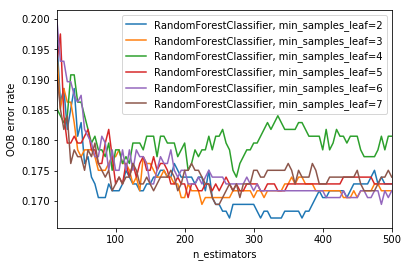

In [373]:
#Сценарий поиска параметров №2, аналогичный тому, что смотрели на лекции.
#Вначале я прогнал варианты с разной глубиной от 2 до 7, по графику лучшей показалась глубина 4
#Потом прогнал по количеству минимального семпла в листьях. Вроде, лучше остальных показал себя семпл==2

ensemble_list = [( "RandomForestClassifier, min_samples_leaf=2",
        RandomForestClassifier(  oob_score=True,
                                 max_depth=4 ,
                                 max_features="sqrt" ,
                                 bootstrap=True, 
                                 warm_start=True,
                                 min_samples_leaf=2 )),                                 
    ( "RandomForestClassifier, min_samples_leaf=3",
        RandomForestClassifier(  oob_score=True,
                                 max_depth=4 ,
                                 max_features="sqrt" ,
                                 bootstrap=True, 
                                 warm_start=True,
                                 min_samples_leaf=3 ))
    ,( "RandomForestClassifier, min_samples_leaf=4",
        RandomForestClassifier(  oob_score=True,
                                 max_depth=4 ,
                                 max_features="sqrt" ,
                                 bootstrap=True, 
                                 warm_start=True,
                                 min_samples_leaf=4 ))
    ,( "RandomForestClassifier, min_samples_leaf=5",
        RandomForestClassifier(  oob_score=True,
                                 max_depth=4 ,
                                 max_features="sqrt" ,
                                 bootstrap=True, 
                                 warm_start=True,
                                 min_samples_leaf=5 ))                
    ,( "RandomForestClassifier, min_samples_leaf=6",
        RandomForestClassifier(  oob_score=True,
                                 max_depth=4 ,
                                 max_features="sqrt" ,
                                 bootstrap=True, 
                                 warm_start=True,
                                 min_samples_leaf=6 ))                
    ,( "RandomForestClassifier, min_samples_leaf=7",
        RandomForestClassifier(  oob_score=True,
                                 max_depth=4 ,
                                 max_features="sqrt" ,
                                 bootstrap=True, 
                                 warm_start=True,
                                 min_samples_leaf=7 ))               
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_list)
     
     # Диапазон значений числа базовых деревьев
min_estimators = 15
max_estimators = 500

for label, clf in ensemble_list:
    for i in range(min_estimators, max_estimators + 1, 5):
        # Задаем число 
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Сохра
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()     

In [116]:
# Дальше всякие тесты качества моделей

y_predicted = bestRFC.predict(X_train)
y_predicted_proba = bestRFC.predict_proba(X_train)

In [117]:
auc_prc( y_train, y_predicted, y_predicted_proba[:, 1] )

accuracy = 	0.903479236813
precision = 	0.923841059603
recall = 	0.815789473684
roc_auc = 	0.958976448407
prc_auc = 	0.946815242298


In [118]:
pr, re, thres = metrics.precision_recall_curve(y_train, y_predicted_proba[:, 1] )
fpr, tpr, thres2 = metrics.roc_curve( y_train, y_predicted_proba[:, 1])

In [4]:
#plt.plot(pr, re)

In [3]:
#plt.plot(fpr, tpr)

### Подбираем параметры для модели №2 GradientBoosting 

In [405]:
# Здесь сценарий №1 подобора параметров бустинга по сетке
pipelineGBC = Pipeline( steps=[ (  "model", GradientBoostingClassifier()  ) ] )

paramsGBC = {"model__max_depth": list(range(3, 5, 1)),
             "model__max_features": list(range(2, 5, 1)),
             "model__min_samples_leaf": list(range( 3, 5, 1)),
             "model__min_samples_split": list(range(2, 5, 1)),
             "model__warm_start": [True, False],
            "model__n_estimators": list(range( 80, 140, 10 )),
             "model__subsample": [0.75, 0.85, 0.65],
            "model__learning_rate": [0.05, 0.075, 0.1, 0.125]}

#making a GridSearch
gridGBC = GridSearchCV(pipelineGBC, paramsGBC, 
                    scoring='accuracy', verbose=10, 
                    cv=kfold, n_jobs=-1)

In [27]:
GradientBoostingClassifier?

In [2]:
#Заряжаем модель 
modelGBC = gridGBC.fit( X_train, y_train )

In [407]:
#лучшие предложенные параметры, но они снова не сыграли в плюс, поэтому обратился к сценарию №2
modelGBC.best_params_

{'model__learning_rate': 0.05,
 'model__max_depth': 4,
 'model__max_features': 4,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 4,
 'model__n_estimators': 80,
 'model__subsample': 0.65,
 'model__warm_start': False}

In [28]:
# создаю отдельную модель с предложенными параметрами для ускорения расчета

bestGBC = GradientBoostingClassifier( n_estimators=80  
                                 , max_depth=4
                                 , max_features=4 
                                 , min_samples_leaf=4
                                 , min_samples_split=4 
                                 , warm_start=False
                                 , subsample=0.65
                                 , learning_rate=0.05  )
bestGBC.fit( X_train, y_train )
scores = cross_val_score(bestGBC, X_train, y_train, cv=kfold, scoring='accuracy' )
print("average score GBC: ", np.mean(scores) )


average score GBC:  0.822647759867


In [121]:
# снова разные проверки качества модели

y_predicted = bestGBC.predict(X_train)
y_predicted_proba = bestGBC.predict_proba(X_train)

In [122]:
auc_prc( y_train, y_predicted, y_predicted_proba[:, 1] )

accuracy = 	0.875420875421
precision = 	0.913978494624
recall = 	0.745614035088
roc_auc = 	0.931733934107
prc_auc = 	0.916068761167


In [25]:
pr, re, thres = metrics.precision_recall_curve(y_train, y_predicted_proba[:, 1] )
fpr, tpr, thres2 = metrics.roc_curve( y_train, y_predicted_proba[:, 1])

In [2]:
#plt.plot(pr, re)

In [1]:
#plt.plot(fpr, tpr)

### Модель №3 AdaBossting

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
DecisionTreeClassifier?

In [35]:
pipelineAda = Pipeline(steps=[("model", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)))])

paramsAda = {"model__n_estimators": list(range(40, 140, 10)), 
            "model__learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}

gridAda = GridSearchCV(pipelineAda, paramsAda, scoring='accuracy', verbose=10, cv=kfold, n_jobs=-1)

In [36]:
modelAda = gridAda.fit( X_train, y_train )
modelAda.best_params_

"""
{'model__learning_rate': 1.0, 'model__n_estimators': 110}
"""

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV] model__learning_rate=0.1, model__n_estimators=40 ................
[CV] model__learning_rate=0.1, model__n_estimators=40 ................
[CV] model__learning_rate=0.1, model__n_estimators=40 ................
[CV] model__learning_rate=0.1, model__n_estimators=40 ................
[CV]  model__learning_rate=0.1, model__n_estimators=40, score=0.762332, total=   0.2s
[CV] model__learning_rate=0.1, model__n_estimators=50 ................
[CV]  model__learning_rate=0.1, model__n_estimators=40, score=0.802691, total=   0.2s
[CV]  model__learning_rate=0.1, model__n_estimators=40, score=0.784753, total=   0.2s
[CV]  model__learning_rate=0.1, model__n_estimators=40, score=0.828829, total=   0.2s
[CV] model__learning_rate=0.1, model__n_estimators=50 ................
[CV] model__learning_rate=0.1, model__n_estimators=50 ................
[CV] model__learning_rate=0.1, model__n_estimators=50 ................
[CV]  model__learning_rate

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s


[CV]  model__learning_rate=0.1, model__n_estimators=60, score=0.775785, total=   0.3s
[CV] model__learning_rate=0.1, model__n_estimators=70 ................
[CV]  model__learning_rate=0.1, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__learning_rate=0.1, model__n_estimators=70 ................
[CV]  model__learning_rate=0.1, model__n_estimators=60, score=0.789238, total=   0.3s
[CV] model__learning_rate=0.1, model__n_estimators=70 ................
[CV]  model__learning_rate=0.1, model__n_estimators=60, score=0.833333, total=   0.3s
[CV] model__learning_rate=0.1, model__n_estimators=70 ................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s


[CV]  model__learning_rate=0.1, model__n_estimators=70, score=0.811659, total=   0.3s
[CV] model__learning_rate=0.1, model__n_estimators=80 ................
[CV]  model__learning_rate=0.1, model__n_estimators=70, score=0.762332, total=   0.4s
[CV] model__learning_rate=0.1, model__n_estimators=80 ................
[CV]  model__learning_rate=0.1, model__n_estimators=70, score=0.789238, total=   0.4s
[CV] model__learning_rate=0.1, model__n_estimators=80 ................
[CV]  model__learning_rate=0.1, model__n_estimators=70, score=0.833333, total=   0.4s
[CV] model__learning_rate=0.1, model__n_estimators=80 ................
[CV]  model__learning_rate=0.1, model__n_estimators=80, score=0.762332, total=   0.4s
[CV] model__learning_rate=0.1, model__n_estimators=90 ................
[CV]  model__learning_rate=0.1, model__n_estimators=80, score=0.829596, total=   0.5s
[CV] model__learning_rate=0.1, model__n_estimators=90 ................
[CV]  model__learning_rate=0.1, model__n_estimators=80, sc

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s


[CV]  model__learning_rate=0.1, model__n_estimators=90, score=0.829596, total=   0.4s
[CV] model__learning_rate=0.1, model__n_estimators=100 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=90, score=0.833333, total=   0.4s
[CV] model__learning_rate=0.1, model__n_estimators=100 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=90, score=0.766816, total=   0.5s
[CV] model__learning_rate=0.1, model__n_estimators=100 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=90, score=0.780269, total=   0.5s
[CV] model__learning_rate=0.1, model__n_estimators=100 ...............


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s


[CV]  model__learning_rate=0.1, model__n_estimators=100, score=0.766816, total=   0.4s
[CV] model__learning_rate=0.1, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=100, score=0.829596, total=   0.6s
[CV] model__learning_rate=0.1, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=100, score=0.780269, total=   0.5s
[CV] model__learning_rate=0.1, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=100, score=0.833333, total=   0.6s
[CV] model__learning_rate=0.1, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=110, score=0.829596, total=   0.5s
[CV] model__learning_rate=0.1, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=110, score=0.766816, total=   0.5s
[CV] model__learning_rate=0.1, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s


[CV]  model__learning_rate=0.1, model__n_estimators=120, score=0.833333, total=   0.6s
[CV] model__learning_rate=0.1, model__n_estimators=130 ...............
[CV]  model__learning_rate=0.1, model__n_estimators=130, score=0.829596, total=   0.7s
[CV] model__learning_rate=0.3, model__n_estimators=40 ................
[CV]  model__learning_rate=0.1, model__n_estimators=130, score=0.771300, total=   0.7s
[CV] model__learning_rate=0.3, model__n_estimators=40 ................
[CV]  model__learning_rate=0.1, model__n_estimators=130, score=0.780269, total=   0.7s
[CV] model__learning_rate=0.3, model__n_estimators=40 ................
[CV]  model__learning_rate=0.3, model__n_estimators=40, score=0.829596, total=   0.2s
[CV] model__learning_rate=0.3, model__n_estimators=40 ................
[CV]  model__learning_rate=0.3, model__n_estimators=40, score=0.757848, total=   0.2s
[CV] model__learning_rate=0.3, model__n_estimators=50 ................
[CV]  model__learning_rate=0.1, model__n_estimators=13

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s


[CV]  model__learning_rate=0.3, model__n_estimators=50, score=0.829596, total=   0.2s
[CV] model__learning_rate=0.3, model__n_estimators=60 ................
[CV]  model__learning_rate=0.3, model__n_estimators=50, score=0.762332, total=   0.3s
[CV] model__learning_rate=0.3, model__n_estimators=60 ................
[CV]  model__learning_rate=0.3, model__n_estimators=50, score=0.775785, total=   0.3s
[CV] model__learning_rate=0.3, model__n_estimators=60 ................
[CV]  model__learning_rate=0.3, model__n_estimators=50, score=0.833333, total=   0.3s
[CV] model__learning_rate=0.3, model__n_estimators=60 ................
[CV]  model__learning_rate=0.3, model__n_estimators=60, score=0.825112, total=   0.3s
[CV] model__learning_rate=0.3, model__n_estimators=70 ................
[CV]  model__learning_rate=0.3, model__n_estimators=60, score=0.771300, total=   0.3s
[CV] model__learning_rate=0.3, model__n_estimators=70 ................
[CV]  model__learning_rate=0.3, model__n_estimators=60, sc

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.4s


[CV]  model__learning_rate=0.3, model__n_estimators=70, score=0.824324, total=   0.4s
[CV] model__learning_rate=0.3, model__n_estimators=80 ................
[CV]  model__learning_rate=0.3, model__n_estimators=80, score=0.775785, total=   0.4s
[CV] model__learning_rate=0.3, model__n_estimators=90 ................
[CV]  model__learning_rate=0.3, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__learning_rate=0.3, model__n_estimators=90 ................
[CV]  model__learning_rate=0.3, model__n_estimators=80, score=0.771300, total=   0.4s
[CV] model__learning_rate=0.3, model__n_estimators=90 ................
[CV]  model__learning_rate=0.3, model__n_estimators=80, score=0.824324, total=   0.4s
[CV] model__learning_rate=0.3, model__n_estimators=90 ................
[CV]  model__learning_rate=0.3, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__learning_rate=0.3, model__n_estimators=100 ...............
[CV]  model__learning_rate=0.3, model__n_estimators=90, sc

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.6s


[CV]  model__learning_rate=0.3, model__n_estimators=100, score=0.820628, total=   0.5s
[CV] model__learning_rate=0.3, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.3, model__n_estimators=100, score=0.775785, total=   0.5s
[CV] model__learning_rate=0.3, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.3, model__n_estimators=100, score=0.775785, total=   0.5s
[CV] model__learning_rate=0.3, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.3, model__n_estimators=100, score=0.824324, total=   0.5s
[CV] model__learning_rate=0.3, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.3, model__n_estimators=110, score=0.775785, total=   0.5s
[CV] model__learning_rate=0.3, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.3, model__n_estimators=110, score=0.820628, total=   0.6s
[CV] model__learning_rate=0.3, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.3, model__n_estimators=

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.0s


[CV] model__learning_rate=0.5, model__n_estimators=40 ................
[CV]  model__learning_rate=0.5, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__learning_rate=0.5, model__n_estimators=40 ................
[CV]  model__learning_rate=0.5, model__n_estimators=40, score=0.775785, total=   0.2s
[CV] model__learning_rate=0.5, model__n_estimators=50 ................
[CV]  model__learning_rate=0.5, model__n_estimators=40, score=0.828829, total=   0.2s
[CV]  model__learning_rate=0.5, model__n_estimators=40, score=0.771300, total=   0.2s
[CV] model__learning_rate=0.5, model__n_estimators=50 ................
[CV]  model__learning_rate=0.3, model__n_estimators=130, score=0.824324, total=   0.7s
[CV] model__learning_rate=0.5, model__n_estimators=50 ................
[CV] model__learning_rate=0.5, model__n_estimators=50 ................
[CV]  model__learning_rate=0.5, model__n_estimators=50, score=0.825112, total=   0.3s
[CV] model__learning_rate=0.5, model__n_estimators=60 ...

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.0s


[CV]  model__learning_rate=0.5, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__learning_rate=0.5, model__n_estimators=80 ................
[CV]  model__learning_rate=0.5, model__n_estimators=70, score=0.780269, total=   0.3s
[CV] model__learning_rate=0.5, model__n_estimators=80 ................
[CV]  model__learning_rate=0.5, model__n_estimators=70, score=0.771300, total=   0.4s
[CV] model__learning_rate=0.5, model__n_estimators=80 ................
[CV]  model__learning_rate=0.5, model__n_estimators=70, score=0.828829, total=   0.4s
[CV] model__learning_rate=0.5, model__n_estimators=80 ................
[CV]  model__learning_rate=0.5, model__n_estimators=80, score=0.825112, total=   0.4s
[CV] model__learning_rate=0.5, model__n_estimators=90 ................
[CV]  model__learning_rate=0.5, model__n_estimators=80, score=0.775785, total=   0.5s
[CV] model__learning_rate=0.5, model__n_estimators=90 ................
[CV]  model__learning_rate=0.5, model__n_estimators=80, sc

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.9s


[CV]  model__learning_rate=0.5, model__n_estimators=100, score=0.771300, total=   0.5s
[CV]  model__learning_rate=0.5, model__n_estimators=100, score=0.824324, total=   0.5s
[CV] model__learning_rate=0.5, model__n_estimators=110 ...............
[CV] model__learning_rate=0.5, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.5, model__n_estimators=110, score=0.825112, total=   0.6s
[CV] model__learning_rate=0.5, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.5, model__n_estimators=110, score=0.775785, total=   0.5s
[CV] model__learning_rate=0.5, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.5, model__n_estimators=110, score=0.775785, total=   0.5s
[CV] model__learning_rate=0.5, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.5, model__n_estimators=110, score=0.824324, total=   0.5s
[CV] model__learning_rate=0.5, model__n_estimators=120 ...............
[CV]  model__learning_rate=0.5, model__n_estimators=

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.1s


[CV]  model__learning_rate=0.7, model__n_estimators=40, score=0.775785, total=   0.2s
[CV] model__learning_rate=0.7, model__n_estimators=50 ................
[CV]  model__learning_rate=0.7, model__n_estimators=40, score=0.819820, total=   0.2s
[CV] model__learning_rate=0.7, model__n_estimators=50 ................
[CV]  model__learning_rate=0.7, model__n_estimators=50, score=0.816143, total=   0.3s
[CV]  model__learning_rate=0.7, model__n_estimators=50, score=0.766816, total=   0.3s
[CV] model__learning_rate=0.7, model__n_estimators=60 ................
[CV] model__learning_rate=0.7, model__n_estimators=60 ................
[CV]  model__learning_rate=0.7, model__n_estimators=50, score=0.771300, total=   0.2s
[CV] model__learning_rate=0.7, model__n_estimators=60 ................
[CV]  model__learning_rate=0.7, model__n_estimators=50, score=0.828829, total=   0.3s
[CV] model__learning_rate=0.7, model__n_estimators=60 ................
[CV]  model__learning_rate=0.7, model__n_estimators=60, sc

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   16.7s


[CV]  model__learning_rate=0.7, model__n_estimators=80, score=0.828829, total=   0.5s
[CV] model__learning_rate=0.7, model__n_estimators=90 ................
[CV]  model__learning_rate=0.7, model__n_estimators=90, score=0.775785, total=   0.4s
[CV] model__learning_rate=0.7, model__n_estimators=100 ...............
[CV]  model__learning_rate=0.7, model__n_estimators=90, score=0.784753, total=   0.4s
[CV]  model__learning_rate=0.7, model__n_estimators=90, score=0.825112, total=   0.5s
[CV] model__learning_rate=0.7, model__n_estimators=100 ...............
[CV] model__learning_rate=0.7, model__n_estimators=100 ...............
[CV]  model__learning_rate=0.7, model__n_estimators=90, score=0.833333, total=   0.5s
[CV] model__learning_rate=0.7, model__n_estimators=100 ...............
[CV]  model__learning_rate=0.7, model__n_estimators=100, score=0.820628, total=   0.5s
[CV] model__learning_rate=0.7, model__n_estimators=110 ...............
[CV]  model__learning_rate=0.7, model__n_estimators=100, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.0s


[CV]  model__learning_rate=0.7, model__n_estimators=120, score=0.789238, total=   0.6s
[CV] model__learning_rate=0.7, model__n_estimators=130 ...............
[CV]  model__learning_rate=0.7, model__n_estimators=120, score=0.833333, total=   0.6s
[CV] model__learning_rate=0.7, model__n_estimators=130 ...............
[CV]  model__learning_rate=0.7, model__n_estimators=130, score=0.825112, total=   0.6s
[CV] model__learning_rate=0.9, model__n_estimators=40 ................
[CV]  model__learning_rate=0.7, model__n_estimators=130, score=0.780269, total=   0.6s
[CV] model__learning_rate=0.9, model__n_estimators=40 ................
[CV]  model__learning_rate=0.7, model__n_estimators=130, score=0.780269, total=   0.6s
[CV] model__learning_rate=0.9, model__n_estimators=40 ................
[CV]  model__learning_rate=0.9, model__n_estimators=40, score=0.825112, total=   0.2s
[CV] model__learning_rate=0.9, model__n_estimators=40 ................
[CV]  model__learning_rate=0.9, model__n_estimators=4

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   20.9s


[CV] model__learning_rate=0.9, model__n_estimators=80 ................
[CV]  model__learning_rate=0.9, model__n_estimators=70, score=0.828829, total=   0.3s
[CV] model__learning_rate=0.9, model__n_estimators=80 ................
[CV]  model__learning_rate=0.9, model__n_estimators=80, score=0.829596, total=   0.4s
[CV] model__learning_rate=0.9, model__n_estimators=90 ................
[CV]  model__learning_rate=0.9, model__n_estimators=80, score=0.771300, total=   0.4s
[CV] model__learning_rate=0.9, model__n_estimators=90 ................
[CV]  model__learning_rate=0.9, model__n_estimators=80, score=0.784753, total=   0.4s
[CV]  model__learning_rate=0.9, model__n_estimators=80, score=0.828829, total=   0.4s
[CV] model__learning_rate=0.9, model__n_estimators=90 ................
[CV] model__learning_rate=0.9, model__n_estimators=90 ................
[CV]  model__learning_rate=0.9, model__n_estimators=90, score=0.829596, total=   0.5s
[CV] model__learning_rate=0.9, model__n_estimators=100 ...

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.3s


[CV]  model__learning_rate=0.9, model__n_estimators=120, score=0.825112, total=   0.5s
[CV] model__learning_rate=0.9, model__n_estimators=130 ...............
[CV]  model__learning_rate=0.9, model__n_estimators=120, score=0.780269, total=   0.7s
[CV] model__learning_rate=0.9, model__n_estimators=130 ...............
[CV]  model__learning_rate=0.9, model__n_estimators=120, score=0.819820, total=   0.5s
[CV] model__learning_rate=0.9, model__n_estimators=130 ...............
[CV]  model__learning_rate=0.9, model__n_estimators=120, score=0.793722, total=   0.6s
[CV] model__learning_rate=0.9, model__n_estimators=130 ...............
[CV]  model__learning_rate=0.9, model__n_estimators=130, score=0.829596, total=   0.6s
[CV] model__learning_rate=1.0, model__n_estimators=40 ................
[CV]  model__learning_rate=0.9, model__n_estimators=130, score=0.775785, total=   0.6s
[CV] model__learning_rate=1.0, model__n_estimators=40 ................
[CV]  model__learning_rate=1.0, model__n_estimators=

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   25.7s


[CV]  model__learning_rate=1.0, model__n_estimators=70, score=0.793722, total=   0.4s
[CV] model__learning_rate=1.0, model__n_estimators=80 ................
[CV]  model__learning_rate=1.0, model__n_estimators=70, score=0.828829, total=   0.4s
[CV] model__learning_rate=1.0, model__n_estimators=80 ................
[CV]  model__learning_rate=1.0, model__n_estimators=80, score=0.838565, total=   0.5s
[CV] model__learning_rate=1.0, model__n_estimators=90 ................
[CV]  model__learning_rate=1.0, model__n_estimators=80, score=0.780269, total=   0.4s
[CV] model__learning_rate=1.0, model__n_estimators=90 ................
[CV]  model__learning_rate=1.0, model__n_estimators=80, score=0.793722, total=   0.4s
[CV] model__learning_rate=1.0, model__n_estimators=90 ................
[CV]  model__learning_rate=1.0, model__n_estimators=80, score=0.824324, total=   0.4s
[CV] model__learning_rate=1.0, model__n_estimators=90 ................
[CV]  model__learning_rate=1.0, model__n_estimators=90, sc

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   29.2s finished


"\n{'model__learning_rate': 1.0, 'model__n_estimators': 110}\n"

In [33]:
bestAda = AdaBoostClassifier( n_estimators=110, learning_rate=1.0, base_estimator=DecisionTreeClassifier(max_depth=1))
bestAda.fit( X_train, y_train )

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=110, random_state=None)

In [34]:
scores = cross_val_score(bestAda, X_train, y_train, cv=kfold, scoring='accuracy' )
print("average score AdaBoost : ", np.mean(scores) ) #0.810290671838

average score AdaBoost :  0.805861915727


In [83]:
y_predicted = bestAda.predict(X_train)
y_predicted_proba = bestAda.predict_proba(X_train)

accuracy = 	0.840628507295
precision = 	0.797619047619
recall = 	0.783625730994
roc_auc = 	0.90654725764
prc_auc = 	0.887538909488
accuracy = 	0.840628507295
precision = 	0.797619047619
recall = 	0.783625730994
roc_auc = 	0.90654725764
prc_auc = 	0.887538909488


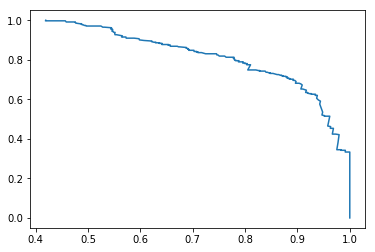

In [84]:
auc_prc( y_train, y_predicted, y_predicted_proba[:, 1] )
auc_prc( y_train, y_predicted, y_predicted_proba[:, 1] )

pr, re, thres = metrics.precision_recall_curve(y_train, y_predicted_proba[:, 1] )
fpr, tpr, thres2 = metrics.roc_curve( y_train, y_predicted_proba[:, 1])

plt.plot(pr, re)

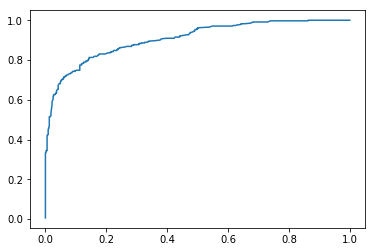

In [85]:
plt.plot(fpr, tpr)

### Модель №4 ExtrTrees 

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

In [39]:
ExtraTreesClassifier?

In [40]:
#1 making a pipeline
pipelineExtrees = Pipeline(steps=[("model", ExtraTreesClassifier(warm_start=True, bootstrap=True, oob_score=True))])

paramsExtrees = {"model__max_depth": list(range(3, 7, 1)),
             "model__min_samples_leaf": list(range(2, 10, 1)),
             "model__min_samples_split": list(range(2, 10, 1)), 
            "model__n_estimators": list(range(10, 100, 10))}

In [41]:
gridExtrees = GridSearchCV(pipelineExtrees, paramsExtrees, 
                    scoring='accuracy', verbose=10, 
                    cv=kfold, n_jobs=-1)

In [42]:
#2 запускаем отладку модели и смотрим на предложенные параметры
modelExtrees = gridExtrees.fit( X_train, y_train )
modelExtrees.best_params_


Fitting 4 folds for each of 2304 candidates, totalling 9216 fits
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.784753, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.783784, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.815315, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1018s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=40, score=0.798206, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=50, score=0.798206, total=   0.2s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=60, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=70 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=60, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=70, score=0.810811, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=80, score=0.775785, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=80, score=0.824324, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.0s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.1s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=60, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=70, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.771300, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.6s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.775785, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    7.3s


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.784753, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.775785, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.792793, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.771300, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.8s


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.793722, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.802691, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.779279, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.0s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30, score=0.780269, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   12.8s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=80, score=0.793722, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.783784, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   15.0s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=70, score=0.793722, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=70, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.762332, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.756757, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   17.1s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=50, score=0.771300, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   19.7s


[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=50, score=0.798206, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=50, score=0.806306, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   22.1s


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=50, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=50, score=0.789238, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=80, score=0.793722, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.771300, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.806306, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.801802, total=   0.1s
[CV] model__max_depth=3, model__min_samples_

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   24.7s


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.810811, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50, score=0.775785, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.829596, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.766816, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   27.6s


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.780269, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.802691, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.783784, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.771300, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   30.5s


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.807175, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.807175, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.780269, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:   33.7s


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.793722, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.779279, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.820628, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.806306, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30 


[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:   37.0s


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30, score=0.815315, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   40.1s


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=50, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=40, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=50, score=0.802691, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 602 tasks      | elapsed:   44.0s


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=80, score=0.793722, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.792793, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:   47.6s


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.819820, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40, score=0.816143, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=50 
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.766816, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   51.2s


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.816143, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.820628, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70, score=0.798206, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=30 
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:   55.2s


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=40, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=30, score=0.771300, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=30, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=40, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.779279, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30, score=0.798206, total=   0.1s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   59.4s


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=70, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=80, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.0s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.829596, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.779279, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=30, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_

[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.1min


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=50, score=0.798206, total=   0.2s
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=60, score=0.802691, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=60 
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=50, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.784753, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.738739, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  1.1min


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:  1.2min


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.762332, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.784753, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.798206, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.815315, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=40 
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=3, model__min_samples_

[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed:  1.3min


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80, score=0.820628, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=70, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=70, score=0.798206, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.784753, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.780269, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_

[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:  1.4min


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=60, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=70, score=0.816143, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.771300, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.789238, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  1.4min


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=50, score=0.793722, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=60, score=0.811659, total=   0.3s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=60 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.771300, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.828829, total=   0.1s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.5min


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=40, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50, score=0.771300, total=   0.2s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.780269, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=3, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.815315, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=40 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30, score=0.780269, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30, score=0.815315, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.780269, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=30 
[CV] model__m

[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:  1.6min


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=50, score=0.819820, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60, score=0.807175, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=50, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.775785, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.775785, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.783784, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 1420 tasks      | elapsed:  1.7min


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=60, score=0.798206, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=70, score=0.820628, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.771300, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 1498 tasks      | elapsed:  1.8min


[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=70, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=80, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=70, score=0.771300, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=70, score=0.815315, total=   0.3s
[CV] model__max_depth=3, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=80, score=0.810811, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.792793, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.806306, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.815315, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.762332, total=   0.1s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.779279, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.9min


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.771300, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.3s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.766816, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.792793, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.789238, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30, score=0.793722, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 


[Parallel(n_jobs=-1)]: Done 1658 tasks      | elapsed:  2.0min


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30, score=0.811659, total=   0.2s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=40 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=40, score=0.793722, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.829596, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.775785, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30 
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.783784, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.766816, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:  2.1min


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=50, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=50, score=0.771300, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.802691, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.802691, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.793722, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 1826 tasks      | elapsed:  2.2min


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.797297, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.815315, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.762332, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.825112, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.806306, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 1912 tasks      | elapsed:  2.3min


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  2.4min


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=70, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=70, score=0.780269, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=3, model__min_samples_

[Parallel(n_jobs=-1)]: Done 2092 tasks      | elapsed:  2.5min


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40, score=0.811659, total=   0.2s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30, score=0.810811, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=50, score=0.807175, total=   0.3s
[CV] model__max_depth=3, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.775785, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30, score=0.820628, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.793722, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.761261, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 2186 tasks      | elapsed:  2.6min


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=80, score=0.798206, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.3s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.793722, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.810811, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.784753, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.793722, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.779279, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.762332, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.0s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.774775, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=3, model__min_samples

[Parallel(n_jobs=-1)]: Done 2280 tasks      | elapsed:  2.8min


[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50, score=0.820628, total=   0.2s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=3, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.802691, total=   0.4s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.797297, total=   0.1s
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.775785, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 2378 tasks      | elapsed:  2.9min


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.829596, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30, score=0.798206, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.816143, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=50 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.784753, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.819820, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.807175, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.784753, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.806306, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  3.0min


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.793722, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.810811, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 2578 tasks      | elapsed:  3.1min


[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60, score=0.810811, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=70, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=80, score=0.802691, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=70, score=0.798206, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=80, score=0.819820, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.807175, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.807175, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:  3.2min


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=50, score=0.819820, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=60, score=0.793722, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.784753, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.819820, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.771300, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.842342, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 2786 tasks      | elapsed:  3.4min


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=60, score=0.807175, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=50, score=0.793722, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.820628, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.838565, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=80, score=0.810811, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.825112, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.810811, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=80, score=0.833333, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.806306, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  3.5min


[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, score=0.798206, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, score=0.806306, total=   0.2s
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=80, score=0.806306, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.825112, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.798206, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 3002 tasks      | elapsed:  3.6min


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.793722, total=   0.3s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.834081, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.819820, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.819820, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.825112, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.780269, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=40 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30, score=0.807175, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 3112 tasks      | elapsed:  3.8min


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60, score=0.798206, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=70, score=0.811659, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=70 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.838565, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.784753, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.838565, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.789238, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 3226 tasks      | elapsed:  3.9min


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=70, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=80, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=70, score=0.810811, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.793722, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.2s
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 3340 tasks      | elapsed:  4.1min


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80, score=0.806306, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.784753, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.829596, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.780269, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=40 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.802691, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.788288, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 3458 tasks      | elapsed:  4.2min


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30, score=0.811659, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=40, score=0.811659, total=   0.2s
[CV]  model__

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.792793, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.789238, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  4.4min


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50, score=0.807175, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50, score=0.820628, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=40, score=0.806306, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=30, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=30, score=0.834081, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.815315, total=   0.2s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 3698 tasks      | elapsed:  4.5min


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.780269, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.806306, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.819820, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 3820 tasks      | elapsed:  4.7min


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=40 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30, score=0.775785, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=80, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=80 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.774775, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.6s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.779279, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 3946 tasks      | elapsed:  4.8min


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=70, score=0.780269, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=70, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.820628, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.780269, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=40 
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.793722, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:  5.0min


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.788288, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 4202 tasks      | elapsed:  5.1min


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.780269, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.793722, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.815315, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 4332 tasks      | elapsed:  5.3min


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=40, score=0.793722, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=50, score=0.811659, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=50 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=40, score=0.815315, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90, score=0.815315, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=40 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.752252, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.829596, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.779279, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.829596, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 4466 tasks      | elapsed:  5.5min


[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30, score=0.793722, total=   0.2s
[CV] model__max_depth=4, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.784753, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.793722, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.820628, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=4, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30, score=0.811659, total=   0.2s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30, score=0.784753, total=   0.2s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=4, model__min_samples

[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  5.6min


[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=80, score=0.811659, total=   0.5s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=80, score=0.798206, total=   0.4s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.829596, total=   0.1s
[CV]  model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30, score=0.829596, total=   0.2s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.824324, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.6s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30, score=0.834081, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.819820, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.819820, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.828829, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__max_depth=5, model__min_samples_

[Parallel(n_jobs=-1)]: Done 4738 tasks      | elapsed:  5.8min


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.802691, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.825112, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=70, score=0.833333, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.833333, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.829596, total=   0.2s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.784753, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.819820, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.819820, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=40 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=80, score=0.824324, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=80, score=0.828829, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.802691, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=80, score=0.828829, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.775785, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

[Parallel(n_jobs=-1)]: Done 4876 tasks      | elapsed:  6.0min


[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=50, score=0.793722, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=50, score=0.815315, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60, score=0.829596, total=   0.3s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=80, score=0.824324, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.819820, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.807175, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.834081, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.838565, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.793722, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.833333, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_

[Parallel(n_jobs=-1)]: Done 5018 tasks      | elapsed:  6.1min


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=40, score=0.833333, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60, score=0.825112, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=50, score=0.793722, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.825112, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=80, score=0.819820, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.829596, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=80, score=0.819820, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.837838, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.802691, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.797297, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=40 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30, score=0.825112, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.819820, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  6.3min


[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=40, score=0.793722, total=   0.3s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=50, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=50 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=50, score=0.816143, total=   0.3s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=40, score=0.810811, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=50 
[CV] model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.801802, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.824324, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.761261, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30, score=0.829596, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.797297, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.819820, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.784753, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.6s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=80, score=0.819820, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

[Parallel(n_jobs=-1)]: Done 5306 tasks      | elapsed:  6.5min


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.829596, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.819820, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=50, score=0.798206, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.819820, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=80, score=0.819820, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.801802, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=80, score=0.819820, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=80, score=0.833333, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

[Parallel(n_jobs=-1)]: Done 5452 tasks      | elapsed:  6.7min


[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=50, score=0.793722, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=60, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=50, score=0.824324, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=80, score=0.833333, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.793722, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90, score=0.819820, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.780269, total=   0.2s
[CV] model__max_depth=5, model__min_samples_

[Parallel(n_jobs=-1)]: Done 5602 tasks      | elapsed:  6.9min


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=70, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=70, score=0.815315, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.825112, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.810811, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.847534, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.802691, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.815315, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.789238, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

[Parallel(n_jobs=-1)]: Done 5752 tasks      | elapsed:  7.1min


[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=80, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.815315, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.793722, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30, score=0.793722, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 


[Parallel(n_jobs=-1)]: Done 5906 tasks      | elapsed:  7.3min


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30, score=0.793722, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.792793, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.5s
[CV]  model__

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.815315, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30, score=0.793722, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30, score=0.815315, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.792793, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_

[Parallel(n_jobs=-1)]: Done 6060 tasks      | elapsed:  7.5min


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=40, score=0.815315, total=   0.2s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=60 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=50, score=0.793722, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.793722, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.792793, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.783784, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30, score=0.820628, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=90, score=0.789238, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples

[Parallel(n_jobs=-1)]: Done 6218 tasks      | elapsed:  7.7min


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=70, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=80, score=0.798206, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.793722, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=30, score=0.802691, total=   0.2s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.825112, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.6s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.757848, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 6376 tasks      | elapsed:  7.9min


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=40 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30, score=0.798206, total=   0.2s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=40, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=50 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=30, score=0.815315, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_spl

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.2s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.6s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.806306, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.771300, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_

[Parallel(n_jobs=-1)]: Done 6538 tasks      | elapsed:  8.1min


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=60, score=0.806306, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=70, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=70 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=80, score=0.807175, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=70, score=0.793722, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.780269, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.3s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.810811, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.825112, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.5s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30, score=0.816143, total=   0.2s


[Parallel(n_jobs=-1)]: Done 6700 tasks      | elapsed:  8.3min


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30, score=0.815315, total=   0.2s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40, score=0.811659, total=   0.3s
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.2s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.807175, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.806306, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

[Parallel(n_jobs=-1)]: Done 6866 tasks      | elapsed:  8.5min


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=80, score=0.811659, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=80 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=5, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=80, score=0.798206, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.788288, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=5, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.838565, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=80, score=0.793722, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.829596, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=10, score=0.801802, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=20, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.843049, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.829596, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=80, score=0.833333, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=80, score=0.789238, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.789238, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=90, score=0.789238, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:  8.7min


[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60, score=0.825112, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=50, score=0.802691, total=   0.4s
[CV] model__max_depth=6, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=80, score=0.833333, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.843049, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=80, score=0.833333, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.838565, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=90, score=0.807175, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=30, score=0.820628, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=20, score=0.833333, total=   0.1s
[CV] model__m

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=7, model__n_estimators=90, score=0.789238, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.829596, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=8, model__n_estimators=80, score=0.828829, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=80, score=0.828829, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.793722, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=10, score=0.833333, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 7202 tasks      | elapsed:  8.9min


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30, score=0.829596, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=40 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=9, model__n_estimators=90, score=0.828829, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=6, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.789238, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=20, score=0.819820, total=   0.2s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=2, model__n_estimators=90, score=0.833333, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.834081, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=80, score=0.828829, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=80, score=0.824324, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=4, model__n_estimators=90, score=0.802691, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.834081, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=80, score=0.828829, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=5, model__n_estimators=90, score=0.807175, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__min_samples_

[Parallel(n_jobs=-1)]: Done 7372 tasks      | elapsed:  9.2min
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=80, score=0.828829, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=10, score=0.833333, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=6, model__n_estimators=90, score=0.833333, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=40 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=20, score=0.806306, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=30, score=0.833333, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=80, score=0.819820, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.780269, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=7, model__n_estimators=90, score=0.824324, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.833333, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.2s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=8, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.834081, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=80, score=0.789238, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.825112, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.829596, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=30, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=10, score=0.792793, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 7546 tasks      | elapsed:  9.4min


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.807175, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=70, score=0.802691, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.834081, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=80, score=0.833333, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.793722, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.829596, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.834081, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=80, score=0.819820, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.798206, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.784753, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=20, score=0.815315, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=90, score=0.802691, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=80, score=0.810811, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.775785, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90, score=0.825112, total=   0.6s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.775785, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=20, score=0.806306, total=   0.1s
[CV] model__max_depth=6, model__min_samples_

[Parallel(n_jobs=-1)]: Done 7720 tasks      | elapsed:  9.6min


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=60, score=0.798206, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=80 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.820628, total=   0.6s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.775785, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.833333, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=20, score=0.819820, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=2, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=30, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=40, score=0.807175, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.838565, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.784753, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=3, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30, score=0.834081, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.834081, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=4, model__n_estimators=90, score=0.810811, total=   0.4s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 7898 tasks      | elapsed:  9.8min


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, score=0.798206, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=10, score=0.797297, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.816143, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.807175, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.825112, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=7, model__n_estimators=90, score=0.819820, total=   0.4s
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=80, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=10, score=0.824324, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.780269, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=9, model__n_estimators=90, score=0.793722, total=   0.6s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 8076 tasks      | elapsed: 10.1min


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=50, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=50, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=40, score=0.793722, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=40, score=0.815315, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.820628, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.789238, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.825112, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=20, score=0.833333, total=   0.1s
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.820628, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.834081, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=4, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.820628, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90, score=0.816143, total=   0.6s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 8258 tasks      | elapsed: 10.3min


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=50, score=0.793722, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=50, score=0.815315, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=80, score=0.810811, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.775785, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=8, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=10, score=0.806306, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=80, score=0.810811, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=10, score=0.810811, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.829596, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=3, model__n_estimators=90, score=0.780269, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 8440 tasks      | elapsed: 10.5min


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=50, score=0.798206, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=60, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=60, score=0.816143, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=60 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=50, score=0.815315, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.5s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.789238, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=10, score=0.806306, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=4, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=40 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.825112, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.824324, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 8626 tasks      | elapsed: 10.8min


[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=70, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=70 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=80, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=80 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=70, score=0.798206, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.810811, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90, score=0.820628, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=9, model__n_estimators=90 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.798206, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.825112, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=2, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.816143, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=3, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.820628, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.780269, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=4, model__n_estimators=90, score=0.815315, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=10, score=0.810811, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.829596, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 8812 tasks      | elapsed: 11.0min


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=80, score=0.798206, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6, model__n_estimators=90, score=0.793722, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.771300, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=7, model__n_estimators=90, score=0.798206, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=8, model__n_estimators=90, score=0.815315, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=10, score=0.788288, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.829596, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.807175, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=10, score=0.828829, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.780269, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=9, model__n_estimators=90, score=0.815315, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30, score=0.811659, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.825112, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.774775, total=   0.1s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=2, model__n_estimators=90, score=0.798206, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.793722, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=3, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 9002 tasks      | elapsed: 11.2min


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30, score=0.825112, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40, score=0.820628, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=30, score=0.798206, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.811659, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=10, score=0.810811, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.798206, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=4, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.820628, total=   0.6s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.816143, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=80, score=0.815315, total=   0.4s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.793722, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.793722, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20, score=0.811659, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=5, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=40 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30, score=0.816143, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30, score=0.807175, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.820628, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.820628, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.811659, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.789238, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=10, score=0.819820, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.802691, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.798206, total=   0.4s


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.798206, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=20, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=6, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=30, score=0.802691, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.798206, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.802691, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.816143, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.811659, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.807175, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.807175, total=   0.5s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.784753, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20, score=0.816143, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30, score=0.811659, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=7, model__n_estimators=90, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=40 
[CV]  model__max_depth=6, model__min_samples

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.789238, total=   0.1s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=80, score=0.815315, total=   0.4s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 


/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=10, score=0.815315, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.811659, total=   0.1s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20, score=0.802691, total=   0.2s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=20 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=8, model__n_estimators=90, score=0.798206, total=   0.5s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=30 
[CV]  model__max_depth=6, model__min_samples

[Parallel(n_jobs=-1)]: Done 9192 tasks      | elapsed: 11.5min


[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50, score=0.811659, total=   0.3s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=40, score=0.810811, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=60 
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50, score=0.811659, total=   0.3s
[CV] model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50 
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=50, score=0.798206, total=   0.2s
[CV]  model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=9, model__n_estimators=60, score=0.820628, total=   0.3s
[CV] model__m

[Parallel(n_jobs=-1)]: Done 9216 out of 9216 | elapsed: 11.5min finished


{'model__max_depth': 6,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 4,
 'model__n_estimators': 30}

In [ ]:
"""

{'model__max_depth': 6,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 7,
 'model__n_estimators': 100}
"""

"""
{'model__max_depth': 6,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 4,
 'model__n_estimators': 30}
"""



In [43]:
bestExtrees = ExtraTreesClassifier(warm_start=True, bootstrap=True, oob_score=True, 
                                  max_depth=6, min_samples_leaf=2, min_samples_split=4, 
                                  n_estimators=30)
bestExtrees.fit( X_train, y_train )
scores = cross_val_score(bestExtrees, X_train, y_train, cv=kfold, scoring='accuracy' )
print("average score Extrees : ", np.mean(scores) )

#average score Extrees :  0.812588373126

average score Extrees :  0.819289581061


In [186]:
y_predicted = bestExtrees.predict(X_train)
y_predicted_proba = bestExtrees.predict_proba(X_train)

auc_prc( y_train, y_predicted, y_predicted_proba[:, 1] )
auc_prc( y_train, y_predicted, y_predicted_proba[:, 1] )

pr, re, thres = metrics.precision_recall_curve(y_train, y_predicted_proba[:, 1] )
fpr, tpr, thres2 = metrics.roc_curve( y_train, y_predicted_proba[:, 1])

#plt.plot(pr, re)

accuracy = 	0.827160493827
precision = 	0.888429752066
recall = 	0.62865497076
roc_auc = 	0.881496394295
prc_auc = 	0.865901932832
accuracy = 	0.827160493827
precision = 	0.888429752066
recall = 	0.62865497076
roc_auc = 	0.881496394295
prc_auc = 	0.865901932832


In [185]:
#plt.plot(fpr, tpr)

## KNN - проверка алгоритма ближайшего соседа

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#1 making a pipeline
pipelineKNN = Pipeline(steps=[("model", (KNeighborsClassifier()))])

paramsKNN = {"model__n_neighbors": list(range(5, 20, 1)),
             "model__leaf_size": list(range(10, 60, 5)),
             "model__p": list(range( 2, 5, 1))}

In [31]:
gridKNN = GridSearchCV(pipelineKNN, paramsKNN, 
                    scoring='accuracy', verbose=10, 
                    cv=kfold, n_jobs=-1)

In [32]:
#2 запускаем отладку модели и смотрим на предложенные параметры
modelKNN = gridKNN.fit( X_train, y_train )
modelKNN.best_params_

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=2 ...........
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=2 ...........
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=2 ...........
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=2 ...........
[CV]  model__leaf_size=10, model__n_neighbors=5, model__p=2, score=0.668161, total=   0.5s
[CV]  model__leaf_size=10, model__n_neighbors=5, model__p=2, score=0.717489, total=   0.5s
[CV]  model__leaf_size=10, model__n_neighbors=5, model__p=2, score=0.716216, total=   0.5s
[CV]  model__leaf_size=10, model__n_neighbors=5, model__p=2, score=0.704036, total=   0.5s
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=3 ...........
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=3 ...........
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=3 ...........
[CV] model__leaf_size=10, model__n_neighbors=5, model__p=3 ...........
[CV]

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1958s.) Setting batch_size=2.


[CV] model__leaf_size=10, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=10, model__n_neighbors=6, model__p=3, score=0.654709, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=10, model__n_neighbors=6, model__p=4, score=0.659193, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=10, model__n_neighbors=6, model__p=4, score=0.681614, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=6, model__p=3, score=0.738739, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=7, model__p=2 ...........
[CV] model__leaf_size=10, model__n_neighbors=7, model__p=2 ...........
[CV]  model__leaf_size=10, model__n_neighbors=7, model__p=2, score=0.681614, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=6, model__p=4, score=0.681614, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=7, model__p=2, score=0.690583, total=   0.0s
[CV] mod

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1450s.) Setting batch_size=4.


[CV]  model__leaf_size=10, model__n_neighbors=7, model__p=4, score=0.672646, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=8, model__p=3 ...........
[CV] model__leaf_size=10, model__n_neighbors=8, model__p=4 ...........
[CV]  model__leaf_size=10, model__n_neighbors=8, model__p=2, score=0.699552, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=9, model__p=2 ...........
[CV] model__leaf_size=10, model__n_neighbors=8, model__p=2 ...........
[CV]  model__leaf_size=10, model__n_neighbors=8, model__p=3, score=0.672646, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=9, model__p=2, score=0.695067, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=9, model__p=2 ...........
[CV] model__leaf_size=10, model__n_neighbors=8, model__p=3 ...........
[CV]  model__leaf_size=10, model__n_neighbors=8, model__p=4, score=0.677130, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=8, model__p=2, score=0.770270, total=   0.0s
[CV] model__leaf_size=10, mo

[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.4s


[CV] model__leaf_size=10, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=10, model__n_neighbors=10, model__p=2, score=0.699552, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=10, model__p=2 ..........
[CV]  model__leaf_size=10, model__n_neighbors=9, model__p=3, score=0.725225, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=10, model__p=4 ..........
[CV]  model__leaf_size=10, model__n_neighbors=10, model__p=3, score=0.690583, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=10, model__n_neighbors=10, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=10, model__p=2 ..........
[CV]  model__leaf_size=10, model__n_neighbors=10, model__p=2, score=0.720721, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=11, model__p=2 ..........
[CV]  model__leaf_size=10, model__n_neighbors=10, model__p=4, score=0.695067, total=   0.0s
[CV] model__leaf_size=1

[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    2.1s


[CV] model__leaf_size=10, model__n_neighbors=13, model__p=4 ..........
[CV]  model__leaf_size=10, model__n_neighbors=13, model__p=2, score=0.695067, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=13, model__p=2 ..........
[CV]  model__leaf_size=10, model__n_neighbors=13, model__p=3, score=0.713004, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=13, model__p=3 ..........
[CV]  model__leaf_size=10, model__n_neighbors=13, model__p=2, score=0.721973, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=13, model__p=2 ..........
[CV]  model__leaf_size=10, model__n_neighbors=13, model__p=4, score=0.717489, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=13, model__p=4 ..........
[CV]  model__leaf_size=10, model__n_neighbors=13, model__p=2, score=0.702703, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=14, model__p=2 ..........
[CV]  model__leaf_size=10, model__n_neighbors=12, model__p=4, score=0.730942, total=   0.1s
[CV]  model__leaf_size

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    3.1s


[CV] model__leaf_size=10, model__n_neighbors=17, model__p=2 ..........
[CV]  model__leaf_size=10, model__n_neighbors=15, model__p=4, score=0.716216, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=17, model__p=2, score=0.735426, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=17, model__p=2 ..........
[CV] model__leaf_size=10, model__n_neighbors=17, model__p=3 ..........
[CV]  model__leaf_size=10, model__n_neighbors=17, model__p=2, score=0.729730, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=16, model__p=4, score=0.668161, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=16, model__p=3, score=0.726457, total=   0.0s
[CV] model__leaf_size=10, model__n_neighbors=17, model__p=4 ..........
[CV] model__leaf_size=10, model__n_neighbors=16, model__p=4 ..........
[CV] model__leaf_size=10, model__n_neighbors=16, model__p=3 ..........
[CV]  model__leaf_size=10, model__n_neighbors=17, model__p=3, score=0.730942, total=   0.0s
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.0s


[CV] model__leaf_size=10, model__n_neighbors=19, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=5, model__p=3, score=0.668161, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=5, model__p=3 ...........
[CV]  model__leaf_size=15, model__n_neighbors=5, model__p=4, score=0.672646, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=5, model__p=4 ...........
[CV]  model__leaf_size=10, model__n_neighbors=19, model__p=4, score=0.739910, total=   0.0s
[CV]  model__leaf_size=10, model__n_neighbors=19, model__p=3, score=0.725225, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=6, model__p=2 ...........
[CV] model__leaf_size=10, model__n_neighbors=19, model__p=4 ..........
[CV]  model__leaf_size=15, model__n_neighbors=5, model__p=3, score=0.726457, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=6, model__p=2, score=0.659193, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=6, model__p=2 ...........
[CV] model__leaf_size=15, 

[CV] model__leaf_size=15, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=15, model__n_neighbors=8, model__p=3, score=0.743243, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=10, model__p=2 ..........
[CV]  model__leaf_size=15, model__n_neighbors=9, model__p=3, score=0.672646, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=10, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=10, model__p=2 ..........
[CV] model__leaf_size=15, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=15, model__n_neighbors=9, model__p=4, score=0.659193, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=8, model__p=4, score=0.738739, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=9, model__p=4 ...........


[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    5.0s


[CV]  model__leaf_size=15, model__n_neighbors=10, model__p=2, score=0.699552, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=10, model__p=3 ..........
[CV] model__leaf_size=15, model__n_neighbors=10, model__p=2 ..........
[CV]  model__leaf_size=15, model__n_neighbors=9, model__p=3, score=0.699552, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=10, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=9, model__p=3 ...........
[CV] model__leaf_size=15, model__n_neighbors=10, model__p=2 ..........
[CV]  model__leaf_size=15, model__n_neighbors=10, model__p=2, score=0.720721, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=9, model__p=4, score=0.699552, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=15, model__n_neighbors=10, model__p=3, score=0.690583, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=10, model__p=3 ..........
[CV] model__leaf_size=15

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    6.0s


[CV]  model__leaf_size=15, model__n_neighbors=13, model__p=4, score=0.677130, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=14, model__p=2, score=0.672646, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=14, model__p=2 ..........
[CV] model__leaf_size=15, model__n_neighbors=13, model__p=4 ..........
[CV]  model__leaf_size=15, model__n_neighbors=14, model__p=2, score=0.744395, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=13, model__p=3, score=0.721973, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=14, model__p=2 ..........
[CV] model__leaf_size=15, model__n_neighbors=13, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=12, model__p=4, score=0.725225, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=14, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=14, model__p=2, score=0.729730, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=14, model__p=4 ..........
[CV]  model__leaf_size

[CV] model__leaf_size=15, model__n_neighbors=17, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=16, model__p=4, score=0.720721, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=18, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=18, model__p=2, score=0.735426, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=18, model__p=2 ..........
[CV]  model__leaf_size=15, model__n_neighbors=18, model__p=2, score=0.725225, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=18, model__p=4 ..........
[CV]  model__leaf_size=15, model__n_neighbors=17, model__p=3, score=0.729730, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=18, model__p=3, score=0.713004, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=19, model__p=2 ..........
[CV] model__leaf_size=15, model__n_neighbors=18, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=17, model__p=4, score=0.721973, total=   0.0s
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 332 tasks      | elapsed:    7.5s


[CV]  model__leaf_size=15, model__n_neighbors=19, model__p=2, score=0.707207, total=   0.0s
[CV]  model__leaf_size=15, model__n_neighbors=17, model__p=4, score=0.734234, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=19, model__p=3 ..........
[CV] model__leaf_size=15, model__n_neighbors=19, model__p=4 ..........
[CV]  model__leaf_size=15, model__n_neighbors=18, model__p=4, score=0.677130, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=18, model__p=4 ..........
[CV]  model__leaf_size=15, model__n_neighbors=18, model__p=3, score=0.735426, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=18, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=19, model__p=3, score=0.708520, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=19, model__p=3 ..........
[CV]  model__leaf_size=15, model__n_neighbors=19, model__p=4, score=0.717489, total=   0.0s
[CV] model__leaf_size=15, model__n_neighbors=19, model__p=4 ..........
[CV]  model__leaf_size

[CV]  model__leaf_size=20, model__n_neighbors=7, model__p=3, score=0.738739, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=8, model__p=3 ...........
[CV] model__leaf_size=20, model__n_neighbors=8, model__p=4 ...........
[CV]  model__leaf_size=20, model__n_neighbors=8, model__p=2, score=0.765766, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=7, model__p=4, score=0.713004, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=8, model__p=3, score=0.672646, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=8, model__p=3 ...........
[CV] model__leaf_size=20, model__n_neighbors=7, model__p=4 ...........
[CV] model__leaf_size=20, model__n_neighbors=9, model__p=2 ...........
[CV]  model__leaf_size=20, model__n_neighbors=9, model__p=2, score=0.695067, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=8, model__p=4, score=0.672646, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=8, model__p=4 ...........
[CV] model__leaf_size=20, mo

[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:    8.7s


[CV]  model__leaf_size=20, model__n_neighbors=9, model__p=2, score=0.738739, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=9, model__p=3, score=0.686099, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=9, model__p=3 ...........
[CV] model__leaf_size=20, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=20, model__n_neighbors=8, model__p=3, score=0.704036, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=8, model__p=3 ...........
[CV]  model__leaf_size=20, model__n_neighbors=8, model__p=4, score=0.690583, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=9, model__p=3, score=0.672646, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=8, model__p=4 ...........
[CV] model__leaf_size=20, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=20, model__n_neighbors=9, model__p=4, score=0.672646, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=20, m

[CV] model__leaf_size=20, model__n_neighbors=14, model__p=2 ..........
[CV]  model__leaf_size=20, model__n_neighbors=13, model__p=3, score=0.713004, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=13, model__p=3 ..........
[CV]  model__leaf_size=20, model__n_neighbors=13, model__p=4, score=0.717489, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=13, model__p=4 ..........
[CV]  model__leaf_size=20, model__n_neighbors=14, model__p=2, score=0.717489, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=14, model__p=2 ..........
[CV]  model__leaf_size=20, model__n_neighbors=12, model__p=4, score=0.730942, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=12, model__p=4 ..........
[CV]  model__leaf_size=20, model__n_neighbors=14, model__p=2, score=0.672646, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=14, model__p=2 ..........
[CV]  model__leaf_size=20, model__n_neighbors=14, model__p=2, score=0.744395, total=   0.0s
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:   10.1s


[CV]  model__leaf_size=20, model__n_neighbors=13, model__p=4, score=0.711712, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=15, model__p=2 ..........
[CV]  model__leaf_size=20, model__n_neighbors=14, model__p=3, score=0.677130, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=14, model__p=3 ..........
[CV]  model__leaf_size=20, model__n_neighbors=13, model__p=3, score=0.711712, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=15, model__p=2, score=0.708520, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=15, model__p=2 ..........
[CV] model__leaf_size=20, model__n_neighbors=15, model__p=3 ..........
[CV]  model__leaf_size=20, model__n_neighbors=15, model__p=2, score=0.677130, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=14, model__p=4, score=0.677130, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=14, model__p=4 ..........
[CV] model__leaf_size=20, model__n_neighbors=15, model__p=2 ..........
[CV]  model__leaf_size

[CV]  model__leaf_size=20, model__n_neighbors=19, model__p=2, score=0.717489, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=18, model__p=3 ..........
[CV] model__leaf_size=20, model__n_neighbors=19, model__p=2 ..........
[CV]  model__leaf_size=20, model__n_neighbors=18, model__p=4, score=0.677130, total=   0.1s
[CV]  model__leaf_size=20, model__n_neighbors=19, model__p=2, score=0.681614, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=19, model__p=2 ..........
[CV] model__leaf_size=20, model__n_neighbors=18, model__p=4 ..........
[CV]  model__leaf_size=20, model__n_neighbors=17, model__p=4, score=0.734234, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=19, model__p=2, score=0.735426, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=19, model__p=3 ..........
[CV] model__leaf_size=20, model__n_neighbors=19, model__p=2 ..........
[CV]  model__leaf_size=20, model__n_neighbors=18, model__p=3, score=0.725225, total=   0.0s
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   11.7s


[CV]  model__leaf_size=20, model__n_neighbors=19, model__p=4, score=0.681614, total=   0.0s
[CV] model__leaf_size=20, model__n_neighbors=19, model__p=4 ..........
[CV]  model__leaf_size=25, model__n_neighbors=5, model__p=3, score=0.668161, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=19, model__p=3, score=0.735426, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=5, model__p=3 ...........
[CV] model__leaf_size=20, model__n_neighbors=19, model__p=3 ..........
[CV]  model__leaf_size=25, model__n_neighbors=5, model__p=4, score=0.672646, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=5, model__p=4 ...........
[CV]  model__leaf_size=25, model__n_neighbors=5, model__p=3, score=0.730942, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=5, model__p=3 ...........
[CV]  model__leaf_size=20, model__n_neighbors=19, model__p=3, score=0.725225, total=   0.0s
[CV]  model__leaf_size=20, model__n_neighbors=19, model__p=4, score=0.739910, total=   0.0s
[CV]

[CV] model__leaf_size=25, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=25, model__n_neighbors=9, model__p=4, score=0.677130, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=25, model__n_neighbors=8, model__p=3, score=0.743243, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=10, model__p=2 ..........
[CV]  model__leaf_size=25, model__n_neighbors=9, model__p=3, score=0.672646, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=25, model__n_neighbors=10, model__p=2, score=0.695067, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=10, model__p=2 ..........
[CV]  model__leaf_size=25, model__n_neighbors=8, model__p=4, score=0.690583, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=8, model__p=4 ...........
[CV]  model__leaf_size=25, model__n_neighbors=9, model__p=4, score=0.659193, total=   0.0s
[CV] model__leaf_size=25, m

[Parallel(n_jobs=-1)]: Done 604 tasks      | elapsed:   13.4s


[CV]  model__leaf_size=25, model__n_neighbors=11, model__p=3, score=0.704036, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=11, model__p=3 ..........
[CV]  model__leaf_size=25, model__n_neighbors=11, model__p=4, score=0.699552, total=   0.0s
[CV]  model__leaf_size=25, model__n_neighbors=10, model__p=3, score=0.729730, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=11, model__p=4 ..........
[CV]  model__leaf_size=25, model__n_neighbors=10, model__p=4, score=0.677130, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=10, model__p=4 ..........
[CV] model__leaf_size=25, model__n_neighbors=12, model__p=2 ..........
[CV]  model__leaf_size=25, model__n_neighbors=12, model__p=2, score=0.677130, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=12, model__p=2 ..........
[CV]  model__leaf_size=25, model__n_neighbors=11, model__p=3, score=0.695067, total=   0.0s
[CV]  model__leaf_size=25, model__n_neighbors=12, model__p=2, score=0.690583, total=   0.0s
[

[CV]  model__leaf_size=25, model__n_neighbors=15, model__p=3, score=0.663677, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=15, model__p=3 ..........
[CV]  model__leaf_size=25, model__n_neighbors=15, model__p=4, score=0.668161, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=16, model__p=2 ..........
[CV] model__leaf_size=25, model__n_neighbors=15, model__p=4 ..........
[CV]  model__leaf_size=25, model__n_neighbors=16, model__p=2, score=0.717489, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=16, model__p=2 ..........
[CV]  model__leaf_size=25, model__n_neighbors=14, model__p=4, score=0.716216, total=   0.1s
[CV]  model__leaf_size=25, model__n_neighbors=16, model__p=2, score=0.677130, total=   0.0s
[CV]  model__leaf_size=25, model__n_neighbors=15, model__p=3, score=0.726457, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=16, model__p=3 ..........
[CV] model__leaf_size=25, model__n_neighbors=16, model__p=2 ..........
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   15.5s


[CV]  model__leaf_size=25, model__n_neighbors=18, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=16, model__p=4 ..........
[CV] model__leaf_size=25, model__n_neighbors=18, model__p=2 ..........
[CV]  model__leaf_size=25, model__n_neighbors=18, model__p=2, score=0.735426, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=18, model__p=2 ..........
[CV]  model__leaf_size=25, model__n_neighbors=17, model__p=4, score=0.668161, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=17, model__p=4 ..........
[CV]  model__leaf_size=25, model__n_neighbors=17, model__p=3, score=0.721973, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=17, model__p=3 ..........
[CV]  model__leaf_size=25, model__n_neighbors=18, model__p=2, score=0.725225, total=   0.0s
[CV] model__leaf_size=25, model__n_neighbors=18, model__p=3 ..........
[CV]  model__leaf_size=25, model__n_neighbors=16, model__p=4, score=0.720721, total=   0.0s
[CV] model__leaf_size=

[CV]  model__leaf_size=30, model__n_neighbors=7, model__p=3, score=0.672646, total=   0.0s
[CV]  model__leaf_size=30, model__n_neighbors=7, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=7, model__p=2 ...........
[CV] model__leaf_size=30, model__n_neighbors=7, model__p=3 ...........
[CV]  model__leaf_size=30, model__n_neighbors=6, model__p=4, score=0.681614, total=   0.0s
[CV]  model__leaf_size=30, model__n_neighbors=7, model__p=2, score=0.734234, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=6, model__p=4 ...........
[CV] model__leaf_size=30, model__n_neighbors=7, model__p=4 ...........
[CV]  model__leaf_size=30, model__n_neighbors=6, model__p=3, score=0.690583, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=6, model__p=3 ...........
[CV]  model__leaf_size=30, model__n_neighbors=6, model__p=4, score=0.681614, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=30, m

[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   17.6s


[CV]  model__leaf_size=30, model__n_neighbors=10, model__p=2, score=0.729730, total=   0.0s
[CV]  model__leaf_size=30, model__n_neighbors=9, model__p=3, score=0.672646, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=10, model__p=4 ..........
[CV] model__leaf_size=30, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=30, model__n_neighbors=9, model__p=4, score=0.659193, total=   0.0s
[CV]  model__leaf_size=30, model__n_neighbors=10, model__p=3, score=0.695067, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=9, model__p=4 ...........
[CV] model__leaf_size=30, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=30, model__n_neighbors=9, model__p=3, score=0.699552, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=30, model__n_neighbors=9, model__p=4, score=0.699552, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=30,

[CV] model__leaf_size=30, model__n_neighbors=14, model__p=4 ..........
[CV]  model__leaf_size=30, model__n_neighbors=14, model__p=3, score=0.704036, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=14, model__p=3 ..........
[CV]  model__leaf_size=30, model__n_neighbors=13, model__p=3, score=0.721973, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=13, model__p=3 ..........
[CV]  model__leaf_size=30, model__n_neighbors=14, model__p=3, score=0.677130, total=   0.0s
[CV]  model__leaf_size=30, model__n_neighbors=13, model__p=4, score=0.726457, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=13, model__p=4 ..........
[CV] model__leaf_size=30, model__n_neighbors=14, model__p=3 ..........
[CV]  model__leaf_size=30, model__n_neighbors=14, model__p=4, score=0.717489, total=   0.1s
[CV] model__leaf_size=30, model__n_neighbors=14, model__p=4 ..........
[CV]  model__leaf_size=30, model__n_neighbors=13, model__p=3, score=0.711712, total=   0.0s
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   19.7s


[CV]  model__leaf_size=30, model__n_neighbors=15, model__p=3, score=0.707207, total=   0.0s
[CV]  model__leaf_size=30, model__n_neighbors=16, model__p=3, score=0.672646, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=17, model__p=2 ..........
[CV] model__leaf_size=30, model__n_neighbors=16, model__p=3 ..........
[CV]  model__leaf_size=30, model__n_neighbors=17, model__p=2, score=0.717489, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=17, model__p=2 ..........
[CV]  model__leaf_size=30, model__n_neighbors=17, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=17, model__p=2 ..........
[CV]  model__leaf_size=30, model__n_neighbors=15, model__p=4, score=0.716216, total=   0.0s
[CV] model__leaf_size=30, model__n_neighbors=17, model__p=3 ..........
[CV]  model__leaf_size=30, model__n_neighbors=16, model__p=3, score=0.726457, total=   0.0s
[CV]  model__leaf_size=30, model__n_neighbors=16, model__p=4, score=0.668161, total=   0.1s
[

[CV] model__leaf_size=35, model__n_neighbors=5, model__p=3 ...........
[CV]  model__leaf_size=35, model__n_neighbors=5, model__p=4, score=0.699552, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=5, model__p=4 ...........
[CV]  model__leaf_size=30, model__n_neighbors=19, model__p=4, score=0.720721, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=30, model__n_neighbors=19, model__p=3, score=0.725225, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=6, model__p=3 ...........
[CV]  model__leaf_size=35, model__n_neighbors=5, model__p=3, score=0.707207, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=35, model__n_neighbors=6, model__p=2, score=0.659193, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=35, model__n_neighbors=6, model__p=2, score=0.690583, total=   0.0s
[CV]  model__leaf_size=35,

[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:   22.0s


[CV]  model__leaf_size=35, model__n_neighbors=8, model__p=3, score=0.704036, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=8, model__p=3 ...........
[CV]  model__leaf_size=35, model__n_neighbors=8, model__p=4, score=0.690583, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=8, model__p=4 ...........
[CV]  model__leaf_size=35, model__n_neighbors=9, model__p=4, score=0.677130, total=   0.0s
[CV]  model__leaf_size=35, model__n_neighbors=8, model__p=3, score=0.743243, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=35, model__n_neighbors=9, model__p=3, score=0.699552, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=10, model__p=2 ..........
[CV] model__leaf_size=35, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=35, model__n_neighbors=10, model__p=2, score=0.695067, total=   0.0s
[CV]  model__leaf_size=35, model__n_neighbors=8, model__p=4, score=0.738739, total=   0.0s
[CV] mo

[CV] model__leaf_size=35, model__n_neighbors=14, model__p=2 ..........
[CV]  model__leaf_size=35, model__n_neighbors=14, model__p=2, score=0.713004, total=   0.0s
[CV]  model__leaf_size=35, model__n_neighbors=12, model__p=4, score=0.730942, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=12, model__p=4 ..........
[CV] model__leaf_size=35, model__n_neighbors=14, model__p=2 ..........
[CV]  model__leaf_size=35, model__n_neighbors=13, model__p=3, score=0.721973, total=   0.0s
[CV]  model__leaf_size=35, model__n_neighbors=13, model__p=4, score=0.681614, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=13, model__p=3 ..........
[CV] model__leaf_size=35, model__n_neighbors=13, model__p=4 ..........
[CV]  model__leaf_size=35, model__n_neighbors=14, model__p=2, score=0.672646, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=14, model__p=2 ..........
[CV]  model__leaf_size=35, model__n_neighbors=14, model__p=2, score=0.744395, total=   0.0s
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:   24.3s


[CV]  model__leaf_size=35, model__n_neighbors=17, model__p=2, score=0.729730, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=17, model__p=4 ..........
[CV]  model__leaf_size=35, model__n_neighbors=17, model__p=3, score=0.668161, total=   0.1s
[CV]  model__leaf_size=35, model__n_neighbors=16, model__p=4, score=0.668161, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=17, model__p=3 ..........
[CV] model__leaf_size=35, model__n_neighbors=16, model__p=4 ..........
[CV]  model__leaf_size=35, model__n_neighbors=16, model__p=3, score=0.726457, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=16, model__p=3 ..........
[CV]  model__leaf_size=35, model__n_neighbors=17, model__p=4, score=0.730942, total=   0.1s
[CV]  model__leaf_size=35, model__n_neighbors=17, model__p=3, score=0.721973, total=   0.0s
[CV] model__leaf_size=35, model__n_neighbors=17, model__p=3 ..........
[CV] model__leaf_size=35, model__n_neighbors=17, model__p=4 ..........
[CV]  model__leaf_size

[CV] model__leaf_size=40, model__n_neighbors=7, model__p=2 ...........
[CV]  model__leaf_size=40, model__n_neighbors=5, model__p=4, score=0.699552, total=   0.0s
[CV]  model__leaf_size=40, model__n_neighbors=7, model__p=2, score=0.677130, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=7, model__p=2 ...........
[CV] model__leaf_size=40, model__n_neighbors=5, model__p=4 ...........
[CV]  model__leaf_size=40, model__n_neighbors=6, model__p=3, score=0.654709, total=   0.0s
[CV]  model__leaf_size=40, model__n_neighbors=7, model__p=2, score=0.677130, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=6, model__p=3 ...........
[CV] model__leaf_size=40, model__n_neighbors=7, model__p=2 ...........
[CV]  model__leaf_size=40, model__n_neighbors=7, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=7, model__p=2 ...........
[CV]  model__leaf_size=40, model__n_neighbors=6, model__p=4, score=0.659193, total=   0.0s
[CV] model__leaf_size=40, mo

[CV] model__leaf_size=40, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=40, model__n_neighbors=11, model__p=2, score=0.713004, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=11, model__p=2 ..........
[CV] model__leaf_size=40, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=40, model__n_neighbors=11, model__p=2, score=0.699552, total=   0.0s
[CV]  model__leaf_size=40, model__n_neighbors=10, model__p=4, score=0.695067, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=10, model__p=4 ..........
[CV] model__leaf_size=40, model__n_neighbors=11, model__p=2 ..........


[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   26.9s


[CV]  model__leaf_size=40, model__n_neighbors=9, model__p=4, score=0.720721, total=   0.0s
[CV]  model__leaf_size=40, model__n_neighbors=11, model__p=2, score=0.716216, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=11, model__p=3 ..........
[CV] model__leaf_size=40, model__n_neighbors=11, model__p=4 ..........
[CV]  model__leaf_size=40, model__n_neighbors=10, model__p=3, score=0.699552, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=40, model__n_neighbors=10, model__p=4, score=0.677130, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=10, model__p=4 ..........
[CV]  model__leaf_size=40, model__n_neighbors=11, model__p=3, score=0.708520, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=11, model__p=3 ..........
[CV]  model__leaf_size=40, model__n_neighbors=11, model__p=4, score=0.699552, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=11, model__p=4 ..........
[CV]  model__leaf_size=

[CV] model__leaf_size=40, model__n_neighbors=15, model__p=4 ..........
[CV]  model__leaf_size=40, model__n_neighbors=14, model__p=4, score=0.677130, total=   0.1s
[CV] model__leaf_size=40, model__n_neighbors=14, model__p=4 ..........
[CV]  model__leaf_size=40, model__n_neighbors=14, model__p=3, score=0.730942, total=   0.0s
[CV]  model__leaf_size=40, model__n_neighbors=15, model__p=3, score=0.726457, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=14, model__p=3 ..........
[CV] model__leaf_size=40, model__n_neighbors=15, model__p=3 ..........
[CV]  model__leaf_size=40, model__n_neighbors=15, model__p=4, score=0.721973, total=   0.1s
[CV] model__leaf_size=40, model__n_neighbors=15, model__p=4 ..........
[CV]  model__leaf_size=40, model__n_neighbors=14, model__p=3, score=0.711712, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=16, model__p=2 ..........
[CV]  model__leaf_size=40, model__n_neighbors=15, model__p=3, score=0.663677, total=   0.1s
[CV] model__leaf_size=

[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:   29.4s


[CV]  model__leaf_size=40, model__n_neighbors=17, model__p=4, score=0.734234, total=   0.0s
[CV]  model__leaf_size=40, model__n_neighbors=19, model__p=3, score=0.713004, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=19, model__p=4 ..........
[CV] model__leaf_size=40, model__n_neighbors=19, model__p=3 ..........
[CV]  model__leaf_size=40, model__n_neighbors=18, model__p=3, score=0.735426, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=18, model__p=3 ..........
[CV]  model__leaf_size=40, model__n_neighbors=18, model__p=4, score=0.677130, total=   0.1s
[CV] model__leaf_size=40, model__n_neighbors=18, model__p=4 ..........
[CV]  model__leaf_size=40, model__n_neighbors=19, model__p=3, score=0.681614, total=   0.0s
[CV] model__leaf_size=40, model__n_neighbors=19, model__p=3 ..........
[CV]  model__leaf_size=40, model__n_neighbors=18, model__p=3, score=0.725225, total=   0.0s
[CV]  model__leaf_size=40, model__n_neighbors=19, model__p=4, score=0.721973, total=   0.0s
[

[CV] model__leaf_size=45, model__n_neighbors=8, model__p=3 ...........
[CV]  model__leaf_size=45, model__n_neighbors=8, model__p=4, score=0.672646, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=8, model__p=4 ...........
[CV]  model__leaf_size=45, model__n_neighbors=7, model__p=3, score=0.699552, total=   0.1s
[CV] model__leaf_size=45, model__n_neighbors=7, model__p=3 ...........
[CV]  model__leaf_size=45, model__n_neighbors=7, model__p=4, score=0.713004, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=7, model__p=4 ...........
[CV]  model__leaf_size=45, model__n_neighbors=8, model__p=3, score=0.686099, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=8, model__p=3 ...........
[CV]  model__leaf_size=45, model__n_neighbors=7, model__p=3, score=0.738739, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=9, model__p=2 ...........
[CV]  model__leaf_size=45, model__n_neighbors=9, model__p=2, score=0.695067, total=   0.0s
[CV] model__leaf_size=45, mo

[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:   32.4s


[CV] model__leaf_size=45, model__n_neighbors=11, model__p=3 ..........
[CV]  model__leaf_size=45, model__n_neighbors=12, model__p=3, score=0.690583, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=12, model__p=3 ..........
[CV]  model__leaf_size=45, model__n_neighbors=11, model__p=4, score=0.690583, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=11, model__p=4 ..........
[CV]  model__leaf_size=45, model__n_neighbors=11, model__p=3, score=0.707207, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=13, model__p=2 ..........
[CV]  model__leaf_size=45, model__n_neighbors=12, model__p=4, score=0.690583, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=12, model__p=4 ..........
[CV]  model__leaf_size=45, model__n_neighbors=13, model__p=2, score=0.704036, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=13, model__p=2 ..........
[CV]  model__leaf_size=45, model__n_neighbors=13, model__p=2, score=0.695067, total=   0.0s
[CV]  model__leaf_size

[CV]  model__leaf_size=45, model__n_neighbors=15, model__p=3, score=0.711712, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=17, model__p=2 ..........
[CV]  model__leaf_size=45, model__n_neighbors=16, model__p=4, score=0.668161, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=16, model__p=4 ..........
[CV]  model__leaf_size=45, model__n_neighbors=17, model__p=2, score=0.717489, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=17, model__p=2 ..........
[CV]  model__leaf_size=45, model__n_neighbors=15, model__p=4, score=0.716216, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=17, model__p=3 ..........
[CV]  model__leaf_size=45, model__n_neighbors=17, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=17, model__p=2 ..........
[CV]  model__leaf_size=45, model__n_neighbors=16, model__p=3, score=0.726457, total=   0.0s
[CV] model__leaf_size=45, model__n_neighbors=16, model__p=3 ..........
[CV]  model__leaf_size

[CV] model__leaf_size=50, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=50, model__n_neighbors=6, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=50, model__n_neighbors=5, model__p=4, score=0.717489, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=5, model__p=4 ...........
[CV]  model__leaf_size=50, model__n_neighbors=6, model__p=2, score=0.695067, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=50, model__n_neighbors=5, model__p=3, score=0.707207, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=6, model__p=3 ...........
[CV]  model__leaf_size=50, model__n_neighbors=6, model__p=2, score=0.743243, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=45, model__n_neighbors=19, model__p=4, score=0.720721, total=   0.1s
[CV] model__leaf_size=50, m

[Parallel(n_jobs=-1)]: Done 1448 tasks      | elapsed:   36.1s


[CV]  model__leaf_size=50, model__n_neighbors=7, model__p=2, score=0.734234, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=7, model__p=3 ...........
[CV]  model__leaf_size=50, model__n_neighbors=5, model__p=4, score=0.711712, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=7, model__p=4 ...........
[CV]  model__leaf_size=50, model__n_neighbors=6, model__p=3, score=0.690583, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=6, model__p=3 ...........
[CV]  model__leaf_size=50, model__n_neighbors=6, model__p=4, score=0.681614, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=50, model__n_neighbors=7, model__p=3, score=0.677130, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=7, model__p=3 ...........
[CV]  model__leaf_size=50, model__n_neighbors=7, model__p=4, score=0.663677, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=7, model__p=4 ...........
[CV]  model__leaf_size=50, m

[CV] model__leaf_size=50, model__n_neighbors=11, model__p=4 ..........
[CV]  model__leaf_size=50, model__n_neighbors=10, model__p=4, score=0.677130, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=10, model__p=4 ..........
[CV]  model__leaf_size=50, model__n_neighbors=10, model__p=3, score=0.681614, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=50, model__n_neighbors=11, model__p=3, score=0.708520, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=11, model__p=3 ..........
[CV]  model__leaf_size=50, model__n_neighbors=11, model__p=4, score=0.699552, total=   0.1s
[CV]  model__leaf_size=50, model__n_neighbors=10, model__p=4, score=0.677130, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=10, model__p=4 ..........
[CV] model__leaf_size=50, model__n_neighbors=11, model__p=4 ..........
[CV]  model__leaf_size=50, model__n_neighbors=10, model__p=3, score=0.729730, total=   0.0s
[CV] model__leaf_size=

[CV]  model__leaf_size=50, model__n_neighbors=15, model__p=3, score=0.726457, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=15, model__p=3 ..........
[CV]  model__leaf_size=50, model__n_neighbors=15, model__p=4, score=0.721973, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=15, model__p=4 ..........
[CV]  model__leaf_size=50, model__n_neighbors=14, model__p=4, score=0.726457, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=14, model__p=4 ..........
[CV]  model__leaf_size=50, model__n_neighbors=14, model__p=3, score=0.711712, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=16, model__p=2 ..........
[CV]  model__leaf_size=50, model__n_neighbors=16, model__p=2, score=0.721973, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=16, model__p=2 ..........
[CV]  model__leaf_size=50, model__n_neighbors=15, model__p=3, score=0.668161, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=15, model__p=3 ..........
[CV]  model__leaf_size

[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:   40.1s


[CV] model__leaf_size=50, model__n_neighbors=16, model__p=4 ..........
[CV]  model__leaf_size=50, model__n_neighbors=15, model__p=3, score=0.711712, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=17, model__p=2 ..........
[CV]  model__leaf_size=50, model__n_neighbors=15, model__p=4, score=0.716216, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=17, model__p=3 ..........
[CV]  model__leaf_size=50, model__n_neighbors=16, model__p=4, score=0.668161, total=   0.0s
[CV]  model__leaf_size=50, model__n_neighbors=17, model__p=2, score=0.717489, total=   0.0s
[CV] model__leaf_size=50, model__n_neighbors=17, model__p=2 ..........
[CV] model__leaf_size=50, model__n_neighbors=16, model__p=4 ..........
[CV]  model__leaf_size=50, model__n_neighbors=16, model__p=3, score=0.672646, total=   0.1s
[CV] model__leaf_size=50, model__n_neighbors=16, model__p=3 ..........
[CV]  model__leaf_size=50, model__n_neighbors=17, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=

[CV] model__leaf_size=55, model__n_neighbors=5, model__p=3 ...........
[CV] model__leaf_size=55, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=55, model__n_neighbors=6, model__p=2, score=0.659193, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=55, model__n_neighbors=6, model__p=2, score=0.690583, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=55, model__n_neighbors=6, model__p=2, score=0.695067, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=6, model__p=2 ...........
[CV]  model__leaf_size=55, model__n_neighbors=5, model__p=3, score=0.707207, total=   0.0s
[CV]  model__leaf_size=55, model__n_neighbors=6, model__p=2, score=0.743243, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=6, model__p=3 ...........
[CV] model__leaf_size=55, model__n_neighbors=6, model__p=4 ...........
[CV]  model__leaf_size=50, model__n_neighbors=19

[CV]  model__leaf_size=55, model__n_neighbors=10, model__p=2, score=0.725225, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=55, model__n_neighbors=8, model__p=4, score=0.738739, total=   0.1s
[CV] model__leaf_size=55, model__n_neighbors=10, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=9, model__p=3, score=0.699552, total=   0.1s
[CV] model__leaf_size=55, model__n_neighbors=9, model__p=3 ...........
[CV]  model__leaf_size=55, model__n_neighbors=9, model__p=4, score=0.659193, total=   0.1s
[CV] model__leaf_size=55, model__n_neighbors=9, model__p=4 ...........
[CV]  model__leaf_size=55, model__n_neighbors=10, model__p=3, score=0.695067, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=55, model__n_neighbors=10, model__p=4, score=0.695067, total=   0.1s
[CV] model__leaf_size=55, model__n_neighbors=10, model__p=4 ..........
[CV]  model__leaf_size=55

[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:   44.0s


[CV]  model__leaf_size=55, model__n_neighbors=9, model__p=4, score=0.720721, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=11, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=11, model__p=3, score=0.708520, total=   0.0s
[CV]  model__leaf_size=55, model__n_neighbors=10, model__p=3, score=0.681614, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=11, model__p=3 ..........
[CV] model__leaf_size=55, model__n_neighbors=10, model__p=3 ..........
[CV]  model__leaf_size=55, model__n_neighbors=10, model__p=4, score=0.677130, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=10, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=11, model__p=3, score=0.704036, total=   0.0s
[CV]  model__leaf_size=55, model__n_neighbors=11, model__p=4, score=0.699552, total=   0.1s
[CV] model__leaf_size=55, model__n_neighbors=11, model__p=4 ..........
[CV] model__leaf_size=55, model__n_neighbors=11, model__p=3 ..........
[CV]  model__leaf_size=

[CV] model__leaf_size=55, model__n_neighbors=15, model__p=3 ..........
[CV]  model__leaf_size=55, model__n_neighbors=14, model__p=4, score=0.726457, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=14, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=14, model__p=3, score=0.711712, total=   0.1s
[CV] model__leaf_size=55, model__n_neighbors=16, model__p=2 ..........
[CV]  model__leaf_size=55, model__n_neighbors=15, model__p=4, score=0.721973, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=15, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=16, model__p=2, score=0.721973, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=16, model__p=2 ..........
[CV]  model__leaf_size=55, model__n_neighbors=15, model__p=3, score=0.668161, total=   0.0s
[CV]  model__leaf_size=55, model__n_neighbors=16, model__p=2, score=0.677130, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=15, model__p=3 ..........
[CV] model__leaf_size=

[CV]  model__leaf_size=55, model__n_neighbors=19, model__p=4, score=0.717489, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=19, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=19, model__p=3, score=0.681614, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=19, model__p=3 ..........
[CV]  model__leaf_size=55, model__n_neighbors=19, model__p=3, score=0.735426, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=19, model__p=3 ..........
[CV]  model__leaf_size=55, model__n_neighbors=19, model__p=4, score=0.681614, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=19, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=19, model__p=3, score=0.725225, total=   0.0s
[CV]  model__leaf_size=55, model__n_neighbors=19, model__p=4, score=0.739910, total=   0.0s
[CV] model__leaf_size=55, model__n_neighbors=19, model__p=4 ..........
[CV]  model__leaf_size=55, model__n_neighbors=19, model__p=4, score=0.720721, total=   0.0s


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   48.2s finished


{'model__leaf_size': 10, 'model__n_neighbors': 17, 'model__p': 2}

In [39]:
bestKNN = KNeighborsClassifier(n_neighbors=17, leaf_size=10, p=2)

bestKNN.fit( X_train, y_train )
scores = cross_val_score(bestKNN, X_train, y_train, cv=kfold, scoring='accuracy' )
print("average score KNN : ", np.mean(scores) )

average score KNN :  0.727285581546


## Возврат к стеккингу моделей

In [44]:
# инициализирем модели с подобранными гиперпараметрами

# получаем предсказания вероятностей ансамблей на кросс-валидации для обучающей выборки

rf_train_pred = cross_val_predict_proba(bestRFC, X_train, y_train)
gb_train_pred = cross_val_predict_proba(bestGBC, X_train, y_train)
extrees_pred = cross_val_predict_proba(bestExtrees, X_train, y_train)
ada_pred = cross_val_predict_proba(bestAda, X_train, y_train)



X_train_stack = np.stack([ada_pred[:,1]
                         ,extrees_pred[:,1]
                         ,rf_train_pred[:,1]
                         ,gb_train_pred[:,1]
                         ], axis=1)

# получаем предсказания ансамблей для тестовой выборки
rf_test_pred = bestRFC.fit(X_train, y_train).predict_proba(X_test)
gb_test_pred = bestGBC.fit(X_train, y_train).predict_proba(X_test)
ada_test_pred = bestAda.fit(X_train, y_train).predict_proba(X_test)
extrees_test_pred = bestExtrees.fit(X_train, y_train).predict_proba(X_test)

X_test_stack = np.stack([ada_test_pred[:,1]
                         ,extrees_test_pred[:,1]
                         ,rf_test_pred[:,1]
                         ,gb_test_pred[:,1]
                        ], axis=1)

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


## Объединяем предсказания ансамблей с помощью логистической регрессии

### Подбираем гиперпараметры LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# Набросаны разные варианты

paramsLogReg = {"C": [0.06132, 0.06135, 0.06137, 1.2, 1.25, 1.15, 1.23, 1.17, 1.26, 1.27, 1.28, 1.25,
                     1.261, 1.262, 1.263, 1.264, 1.265, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.043, 0.44, 0.37, 0.41, 
                     0.0435, 0.0431, 0.0433, 0.0428, 0.0426, 0.0429]}

#making a GridSearch
gridLogReg = GridSearchCV(LogisticRegression() , paramsLogReg, 
                          scoring="accuracy", cv=kfold, verbose=5, n_jobs=-1)

In [47]:
modelLogReg = gridLogReg.fit( X_train_stack, y_train )
modelLogReg.best_params_

Fitting 4 folds for each of 33 candidates, totalling 132 fits
[CV] C=0.06132 .......................................................
[CV] C=0.06132 .......................................................
[CV] C=0.06132 .......................................................
[CV] C=0.06132 .......................................................
[CV] ........................ C=0.06132, score=0.825112, total=   0.0s
[CV] ........................ C=0.06132, score=0.837838, total=   0.0s
[CV] ........................ C=0.06132, score=0.825112, total=   0.0s
[CV] C=0.06135 .......................................................
[CV] ........................ C=0.06135, score=0.825112, total=   0.0s
[CV] C=0.06135 .......................................................
[CV] C=0.06135 .......................................................
[CV] ........................ C=0.06132, score=0.825112, total=   0.0s
[CV] ........................ C=0.06135, score=0.825112, total=   0.0s
[CV] C=0.06135 

[CV] C=0.37 ..........................................................
[CV] .......................... C=1.265, score=0.838565, total=   0.0s
[CV] ........................... C=0.04, score=0.833333, total=   0.0s
[CV] ........................... C=0.37, score=0.829596, total=   0.0s
[CV] ........................... C=1.25, score=0.838565, total=   0.0s
[CV] C=0.05 ..........................................................
[CV] C=1.25 ..........................................................
[CV] ........................... C=1.25, score=0.833333, total=   0.0s


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s


[CV] C=0.37 ..........................................................
[CV] C=1.265 .........................................................
[CV] C=1.261 .........................................................
[CV] .......................... C=1.265, score=0.833333, total=   0.0s
[CV] ........................... C=0.37, score=0.843049, total=   0.0s
[CV] ........................... C=0.05, score=0.820628, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] C=0.05 ..........................................................
[CV] .......................... C=1.261, score=0.834081, total=   0.0s
[CV] C=0.37 ..........................................................
[CV] C=1.261 .........................................................
[CV] ........................... C=0.37, score=0.833333, total=   0.0s
[CV] ........................... C=0.05, score=0.825112, total=   0.0s
[CV] .......................... C=1.261, score=0.829596, total=   0.0s
[CV] .

[CV] ........................... C=0.44, score=0.829596, total=   0.0s
[CV] C=0.0428 ........................................................
[CV] C=0.44 ..........................................................
[CV] ......................... C=0.0428, score=0.833333, total=   0.0s
[CV] ........................... C=0.44, score=0.829596, total=   0.0s
[CV] C=0.0426 ........................................................
[CV] C=0.44 ..........................................................
[CV] ......................... C=0.0426, score=0.820628, total=   0.0s
[CV] ........................... C=0.44, score=0.843049, total=   0.0s
[CV] C=0.44 ..........................................................
[CV] C=0.0426 ........................................................
[CV] ......................... C=0.0426, score=0.829596, total=   0.0s
[CV] ........................... C=0.44, score=0.833333, total=   0.0s
[CV] C=0.0426 ........................................................
[CV] .

[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    0.8s finished


{'C': 1.2}

In [48]:
# Создаем отдельную модель логита с отобранным значением параметра С

bestLogReg = LogisticRegression(C=1.2) #C=0.44
bestLogReg.fit( X_train_stack, y_train )

scores = cross_val_score(bestLogReg, X_train_stack, y_train, cv=kfold, scoring='accuracy' )
print("average score LogReg: ", np.mean(scores) ) #average score LogReg:  0.82829859007

average score LogReg:  0.833924170808


In [49]:
logreg = bestLogReg

In [55]:
#### Снова проверка качества модели

y_predicted = logreg.predict(X_train_stack)
y_predicted_proba = logreg.predict_proba(X_train_stack)

In [138]:
pr, re, thres = metrics.precision_recall_curve(y_train, y_predicted_proba[:, 1] )
fpr, tpr, thres2 = metrics.roc_curve( y_train, y_predicted_proba[:, 1])

In [139]:
auc_prc( y_train, y_predicted, y_predicted_proba[:, 1] )

accuracy = 	0.821548821549
precision = 	0.825622775801
recall = 	0.678362573099
roc_auc = 	0.864016446703
prc_auc = 	0.843818990484


In [1]:
#plt.plot(pr, re)

In [2]:
#plt.plot(fpr, tpr)

In [50]:
#расчет целевого прогноза
predicted = logreg.predict(X_test_stack)

## Вариант выбора через мягкое голосование в ансамбле 

In [3]:
#VotingClassifier
from sklearn.ensemble import VotingClassifier

In [45]:
voting = VotingClassifier(estimators=[("ada", bestAda), ("rfc", bestRFC), 
                                      ("gbc", bestGBC), ("extrees", bestExtrees)], voting="soft") #knn не включен

In [46]:
voting = voting.fit(X_train, y_train)

In [47]:
predictedVoting = voting.predict(X_test)

## Формируем файл для отправки

In [51]:
with open('submission21.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, y))

Комментарий: 
в результате данная композиция получила 0.79426 по версии Kaggle. 